In [3]:
import pandas as pd
from datetime import date, timedelta
pd.set_option('display.max_columns', 500)
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('ufc_scrape/data_fighters2.csv')

In [5]:
df.head()

,name,record,height,weight,reach,stance,dob,event_name,f1_name_a,f1_name_span,f2_name_a,f2_name_span,weightclass,rounds,time,f1_result,f2_result,f1_kd,f2_kd,f1_sig_str,f2_sig_str,f1_sig_str_perc,f2_sig_str_perc,f1_tot_str,f2_tot_str,f1_td,f2_td,f1_td_perc,f2_td_perc,f1_sub_att,f2_sub_att,f1_pass,f2_pass,f1_rev,f2_rev,f1_sig_str_head,f2_sig_str_head,f1_sig_str_body,f2_sig_str_body,f1_sig_str_leg,f2_sig_str_leg,f1_sig_str_dist,f2_sig_str_dist,f1_sig_str_clinch,f2_sig_str_clinch,f1_sig_str_ground,f2_sig_str_ground
0,\n Tom Aaron\n\n,\n Record: 5-3-0\n,\n --\n,\n 155 lbs.\n,\n --\n,\n \n,"\n \n Jul 13, 1978\n \n",\n\n Strikeforce - Heavy Artillery\n\n,Tom Aaron,NaN,NaN,Eric Steenberg,\n \n Catch Weight Bout\n,"\n ,\n 1\n","\n ,\n \n 0:56\n\n",\n W\n,\n L\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\n Hunter Azure\n\n,\n Record: 8-0-0\n,"\n 5' 8""\n",\n 135 lbs.\n,"\n 69""\n",\n Orthodox\n,"\n \n Mar 02, 1992\n \n",\n\n UFC Fight Night: Cowboy vs. Gaethje\n\n,Brad Katona,NaN,Hunter Azure,NaN,\n \n Bantamweight Bout\n,"\n ,\n 3\n","\n ,\n \n 5:00\n\n",\n L\n,\n W\n,0.0,0.0,\n 21 of 60\n,\n 41 of 118\n,\n 35%\n,\n 34%\n,\n 40 of 83\n,\n 55 of 133\n,\n 3 of 12\n,\n 0 of 1\n,\n 25%\n,\n 0%\n,0.0,0.0,1.0,1.0,0.0,1.0,\n 18 of 51\n,\n 25 of 91\n,\n 2 of 7\n,\n 11 of 20\n,\n 1 of 2\n,\n 5 of 7\n,\n 17 of 54\n,\n 33 of 105\n,\n 4 of 6\n,\n 6 of 8\n,\n 0 of 0\n,\n 2 of 5\n
2,\n Michael Byrnes\n\n,\n Record: 5-2-0\n,"\n 5' 11""\n",\n 155 lbs.\n,\n --\n,\n \n,"\n \n Jul 17, 1990\n \n",\n\n Strikeforce - Miami\n\n,NaN,Michael Byrnes,NaN,Dave Zitanick,\n \n Welterweight Bout\n,"\n ,\n 3\n","\n ,\n \n 5:00\n\n",\n W\n,\n L\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,\n Tom Aaron\n\n,\n Record: 5-3-0\n,\n --\n,\n 155 lbs.\n,\n --\n,\n \n,"\n \n Jul 13, 1978\n \n",\n\n Strikeforce - Henderson vs. Babalu\n\n,Tom Aaron,NaN,NaN,Matt Ricehouse,\n \n Lightweight Bout\n,"\n ,\n 3\n","\n ,\n \n 5:00\n\n",\n L\n,\n W\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\n Ion Cutelaba\n\n,\n Record: 15-5-0 (1 NC)\n ...,"\n 6' 1""\n",\n 205 lbs.\n,"\n 75""\n",\n Southpaw\n,"\n \n Dec 14, 1993\n \n",\n\n UFC Fight Night: MacDonald vs Thompson\n...,Misha Cirkunov,NaN,Ion Cutelaba,NaN,\n \n Light Heavyweight Bout\n,"\n ,\n 3\n","\n ,\n \n 1:22\n\n",\n W\n,\n L\n,0.0,0.0,\n 44 of 94\n,\n 24 of 115\n,\n 46%\n,\n 20%\n,\n 55 of 106\n,\n 25 of 116\n,\n 1 of 3\n,\n 0 of 1\n,\n 33%\n,\n 0%\n,1.0,0.0,1.0,1.0,0.0,0.0,\n 36 of 78\n,\n 12 of 93\n,\n 7 of 15\n,\n 7 of 17\n,\n 1 of 1\n,\n 5 of 5\n,\n 35 of 81\n,\n 20 of 110\n,\n 9 of 13\n,\n 3 of 4\n,\n 0 of 0\n,\n 1 of 1\n


In [6]:
df = df.astype(str)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.replace(['nan','--',''], np.nan)
df = df.replace(['\n',',',' Bout',' lbs.'], '', regex=True)

In [7]:
df.head()

,name,record,height,weight,reach,stance,dob,event_name,f1_name_a,f1_name_span,f2_name_a,f2_name_span,weightclass,rounds,time,f1_result,f2_result,f1_kd,f2_kd,f1_sig_str,f2_sig_str,f1_sig_str_perc,f2_sig_str_perc,f1_tot_str,f2_tot_str,f1_td,f2_td,f1_td_perc,f2_td_perc,f1_sub_att,f2_sub_att,f1_pass,f2_pass,f1_rev,f2_rev,f1_sig_str_head,f2_sig_str_head,f1_sig_str_body,f2_sig_str_body,f1_sig_str_leg,f2_sig_str_leg,f1_sig_str_dist,f2_sig_str_dist,f1_sig_str_clinch,f2_sig_str_clinch,f1_sig_str_ground,f2_sig_str_ground
0,Tom Aaron,Record: 5-3-0,NaN,155,NaN,NaN,Jul 13 1978,Strikeforce - Heavy Artillery,Tom Aaron,NaN,NaN,Eric Steenberg,Catch Weight,1,0:56,W,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hunter Azure,Record: 8-0-0,"5' 8""",135,"69""",Orthodox,Mar 02 1992,UFC Fight Night: Cowboy vs. Gaethje,Brad Katona,NaN,Hunter Azure,NaN,Bantamweight,3,5:00,L,W,0.0,0.0,21 of 60,41 of 118,35%,34%,40 of 83,55 of 133,3 of 12,0 of 1,25%,0%,0.0,0.0,1.0,1.0,0.0,1.0,18 of 51,25 of 91,2 of 7,11 of 20,1 of 2,5 of 7,17 of 54,33 of 105,4 of 6,6 of 8,0 of 0,2 of 5
2,Michael Byrnes,Record: 5-2-0,"5' 11""",155,NaN,NaN,Jul 17 1990,Strikeforce - Miami,NaN,Michael Byrnes,NaN,Dave Zitanick,Welterweight,3,5:00,W,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Aaron,Record: 5-3-0,NaN,155,NaN,NaN,Jul 13 1978,Strikeforce - Henderson vs. Babalu,Tom Aaron,NaN,NaN,Matt Ricehouse,Lightweight,3,5:00,L,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ion Cutelaba,Record: 15-5-0 (1 NC),"6' 1""",205,"75""",Southpaw,Dec 14 1993,UFC Fight Night: MacDonald vs Thompson,Misha Cirkunov,NaN,Ion Cutelaba,NaN,Light Heavyweight,3,1:22,W,L,0.0,0.0,44 of 94,24 of 115,46%,20%,55 of 106,25 of 116,1 of 3,0 of 1,33%,0%,1.0,0.0,1.0,1.0,0.0,0.0,36 of 78,12 of 93,7 of 15,7 of 17,1 of 1,5 of 5,35 of 81,20 of 110,9 of 13,3 of 4,0 of 0,1 of 1


In [8]:
df['f1_name_a'].fillna(df['f1_name_span'], inplace=True)
df['f2_name_a'].fillna(df['f2_name_span'], inplace=True)
df.rename(columns={'f1_name_a':'f1_name', 'f2_name_a':'f2_name'}, inplace=True)
del df['f1_name_span']
del df['f2_name_span']

In [9]:
df.head(5)

,name,record,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,f1_result,f2_result,f1_kd,f2_kd,f1_sig_str,f2_sig_str,f1_sig_str_perc,f2_sig_str_perc,f1_tot_str,f2_tot_str,f1_td,f2_td,f1_td_perc,f2_td_perc,f1_sub_att,f2_sub_att,f1_pass,f2_pass,f1_rev,f2_rev,f1_sig_str_head,f2_sig_str_head,f1_sig_str_body,f2_sig_str_body,f1_sig_str_leg,f2_sig_str_leg,f1_sig_str_dist,f2_sig_str_dist,f1_sig_str_clinch,f2_sig_str_clinch,f1_sig_str_ground,f2_sig_str_ground
0,Tom Aaron,Record: 5-3-0,NaN,155,NaN,NaN,Jul 13 1978,Strikeforce - Heavy Artillery,Tom Aaron,Eric Steenberg,Catch Weight,1,0:56,W,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hunter Azure,Record: 8-0-0,"5' 8""",135,"69""",Orthodox,Mar 02 1992,UFC Fight Night: Cowboy vs. Gaethje,Brad Katona,Hunter Azure,Bantamweight,3,5:00,L,W,0.0,0.0,21 of 60,41 of 118,35%,34%,40 of 83,55 of 133,3 of 12,0 of 1,25%,0%,0.0,0.0,1.0,1.0,0.0,1.0,18 of 51,25 of 91,2 of 7,11 of 20,1 of 2,5 of 7,17 of 54,33 of 105,4 of 6,6 of 8,0 of 0,2 of 5
2,Michael Byrnes,Record: 5-2-0,"5' 11""",155,NaN,NaN,Jul 17 1990,Strikeforce - Miami,Michael Byrnes,Dave Zitanick,Welterweight,3,5:00,W,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Aaron,Record: 5-3-0,NaN,155,NaN,NaN,Jul 13 1978,Strikeforce - Henderson vs. Babalu,Tom Aaron,Matt Ricehouse,Lightweight,3,5:00,L,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ion Cutelaba,Record: 15-5-0 (1 NC),"6' 1""",205,"75""",Southpaw,Dec 14 1993,UFC Fight Night: MacDonald vs Thompson,Misha Cirkunov,Ion Cutelaba,Light Heavyweight,3,1:22,W,L,0.0,0.0,44 of 94,24 of 115,46%,20%,55 of 106,25 of 116,1 of 3,0 of 1,33%,0%,1.0,0.0,1.0,1.0,0.0,0.0,36 of 78,12 of 93,7 of 15,7 of 17,1 of 1,5 of 5,35 of 81,20 of 110,9 of 13,3 of 4,0 of 0,1 of 1


In [10]:
bout_df = pd.read_csv("ufc_scrape/data_fights.csv")

In [11]:
bout_df.head()

,f1_name,f2_name,f1_str,f2_str,f1_tds,f2_tds,f1_subs,f2_subs,f1_pass,f2_pass,weight_class,method,finisher,round_num,time,event_name,event_date
0,\n Anthony Smith\n,\n Alexander Gustafsson\n ...,49,72,0,1,1,0,1,1,\n Light Heavyweight,\n \n \n\n SUB\n\n,\n Rear Naked Choke\n,4,\n\n \n 2:38\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
1,\n Aleksandar Rakic\n,\n Jimi Manuwa\n,2,2,0,0,0,0,0,0,\n Light Heavyweight,\n \n \n\n KO/TKO\n\n,\n Kick\n,1,\n\n \n 0:47\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
2,\n Makwan Amirkhani\n,\n Chris Fishgold\n,9,16,1,0,1,0,2,0,\n Featherweight,\n \n \n\n SUB\n\n,\n Anaconda Choke\n,2,\n\n \n 4:25\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
3,\n Christos Giagos\n,\n Damir Hadzovic\n,47,24,6,1,0,0,3,0,\n Lightweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
4,\n Daniel Teymur\n,\n Sung Bin Jo\n,40,21,1,1,0,1,0,0,\n Featherweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"


In [12]:
bout_df.duplicated(subset=None).sum()

0

In [13]:
bout_df = bout_df.replace(['\n',','],'', regex=True)

In [14]:
bout_df = bout_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [15]:
bout_df = bout_df[['event_name','event_date']]

In [16]:
bout_df['event_date'] = pd.to_datetime(bout_df['event_date'], format='%B %d %Y')
df['dob'] = pd.to_datetime(df['dob'], format='%b %d %Y', errors='coerce')

In [17]:
bout_df = bout_df.drop_duplicates()

In [18]:
bout_df

,event_name,event_date
0,UFC Fight Night: Gustafsson vs. Smith,2019-06-01
12,UFC 238: Cejudo vs. Moraes,2019-06-08
25,UFC Fight Night: Moicano vs. The Korean Zombie,2019-06-22
36,UFC Fight Night: Ngannou vs. Dos Santos,2019-06-29
48,UFC 239: Jones vs. Santos,2019-07-06
...,...,...
5475,UFC Fight Night: Anderson vs. Blachowicz,2020-02-15
5488,UFC Fight Night: Felder vs. Hooker,2020-02-22
5500,UFC Fight Night: Benavidez vs. Figueiredo,2020-02-29
5512,UFC 248: Adesanya vs. Romero,2020-03-07


In [19]:
df = pd.merge(df, bout_df, left_on='event_name', right_on='event_name')

In [20]:
df['height'] = df['height'].replace([' ','"'],'', regex=True)
df[['feet','inches']] = df['height'].str.split("'", expand=True)
df['reach'] = df['reach'].replace('"','', regex=True)

In [21]:
df['feet'] = pd.to_numeric(df['feet'])
df['inches'] = pd.to_numeric(df['inches'])
df['reach'] = pd.to_numeric(df['reach'])

df['height'] = round((df['feet']*0.3048) + (df['inches']*0.0254), 2)
df['reach'] = round(df['reach']*0.0254, 2)

df.drop(columns=['feet','inches'], inplace=True)

df['reach'].fillna(df['height'], inplace=True)
df['height'].fillna(df['reach'], inplace=True)

In [22]:
df_full = df.copy()

In [23]:
df.sort_values(by=['name','event_date'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [24]:
f1_mask = (df['name'] == df['f1_name'])
df_valid_f1 = df[f1_mask]

f2_mask = (df['name'] == df['f2_name'])
df_valid_f2 = df[f2_mask]

df['result'] = 0
df.loc[f1_mask, 'result'] = df_valid_f1['f1_result']
df.loc[f2_mask, 'result'] = df_valid_f2['f2_result']

df['kds'] = 0
df.loc[f1_mask, 'kds'] = df_valid_f1['f1_kd']
df.loc[f2_mask, 'kds'] = df_valid_f2['f2_kd']

df['tds'] = 0
df.loc[f1_mask, 'tds'] = df_valid_f1['f1_td']
df.loc[f2_mask, 'tds'] = df_valid_f2['f2_td']

df['sub_att'] = 0
df.loc[f1_mask, 'sub_att'] = df_valid_f1['f1_sub_att']
df.loc[f2_mask, 'sub_att'] = df_valid_f2['f2_sub_att']

df['pass'] = 0
df.loc[f1_mask, 'pass'] = df_valid_f1['f1_pass']
df.loc[f2_mask, 'pass'] = df_valid_f2['f2_pass']

df['rev'] = 0
df.loc[f1_mask, 'rev'] = df_valid_f1['f1_rev']
df.loc[f2_mask, 'rev'] = df_valid_f2['f2_rev']

df['tot_str'] = 0
df.loc[f1_mask, 'tot_str'] = df_valid_f1['f1_tot_str']
df.loc[f2_mask, 'tot_str'] = df_valid_f2['f2_tot_str']

df['sig_str_head'] = 0
df.loc[f1_mask, 'sig_str_head'] = df_valid_f1['f1_sig_str_head']
df.loc[f2_mask, 'sig_str_head'] = df_valid_f2['f2_sig_str_head']

df['sig_str_body'] = 0
df.loc[f1_mask, 'sig_str_body'] = df_valid_f1['f1_sig_str_body']
df.loc[f2_mask, 'sig_str_body'] = df_valid_f2['f2_sig_str_body']

df['sig_str_leg'] = 0
df.loc[f1_mask, 'sig_str_leg'] = df_valid_f1['f1_sig_str_leg']
df.loc[f2_mask, 'sig_str_leg'] = df_valid_f2['f2_sig_str_leg']

df['sig_str_dist'] = 0
df.loc[f1_mask, 'sig_str_dist'] = df_valid_f1['f1_sig_str_dist']
df.loc[f2_mask, 'sig_str_dist'] = df_valid_f2['f2_sig_str_dist']

df['sig_str_clinch'] = 0
df.loc[f1_mask, 'sig_str_clinch'] = df_valid_f1['f1_sig_str_clinch']
df.loc[f2_mask, 'sig_str_clinch'] = df_valid_f2['f2_sig_str_clinch']

df['sig_str_ground'] = 0
df.loc[f1_mask, 'sig_str_ground'] = df_valid_f1['f1_sig_str_ground']
df.loc[f2_mask, 'sig_str_ground'] = df_valid_f2['f2_sig_str_ground']

In [25]:
df = df.drop(columns=['f1_result','f2_result',
                     'f1_kd','f2_kd',
                     'f1_td','f2_td',
                     'f1_sub_att','f2_sub_att',
                     'f1_rev','f2_rev',
                     'f1_sig_str_head','f2_sig_str_head',
                     'f1_sig_str_body','f2_sig_str_body',
                     'f1_sig_str_leg','f2_sig_str_leg',
                     'f1_sig_str_dist','f2_sig_str_dist',
                     'f1_sig_str_clinch','f2_sig_str_clinch',
                     'f1_sig_str_ground','f2_sig_str_ground',
                     'f1_sig_str','f2_sig_str',
                     'f1_sig_str_perc','f2_sig_str_perc',
                     'f1_tot_str','f2_tot_str',
                     'f1_td_perc','f2_td_perc',
                     'f1_pass','f2_pass'])

In [26]:
df.replace(' of ',' ', regex=True, inplace=True)

df[['tds_succ','tds_att']] = df['tds'].str.split(" ", expand=True)
df.drop(columns=['tds'], inplace=True)

df[['tot_str_succ','tot_str_att']] = df['tot_str'].str.split(" ", expand=True)
df.drop(columns=['tot_str'], inplace=True)

df[['sig_str_head_succ','sig_str_head_att']] = df['sig_str_head'].str.split(" ", expand=True)
df.drop(columns=['sig_str_head'], inplace=True)

df[['sig_str_body_succ','sig_str_body_att']] = df['sig_str_body'].str.split(" ", expand=True)
df.drop(columns=['sig_str_body'], inplace=True)

df[['sig_str_leg_succ','sig_str_leg_att']] = df['sig_str_leg'].str.split(" ", expand=True)
df.drop(columns=['sig_str_leg'], inplace=True)

df[['sig_str_dist_succ','sig_str_dist_att']] = df['sig_str_dist'].str.split(" ", expand=True)
df.drop(columns=['sig_str_dist'], inplace=True)

df[['sig_str_clinch_succ','sig_str_clinch_att']] = df['sig_str_clinch'].str.split(" ", expand=True)
df.drop(columns=['sig_str_clinch'], inplace=True)

df[['sig_str_ground_succ','sig_str_ground_att']] = df['sig_str_ground'].str.split(" ", expand=True)
df.drop(columns=['sig_str_ground'], inplace=True)

In [27]:
df.head()

,name,record,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,event_date,result,kds,sub_att,pass,rev,tds_succ,tds_att,tot_str_succ,tot_str_att,sig_str_head_succ,sig_str_head_att,sig_str_body_succ,sig_str_body_att,sig_str_leg_succ,sig_str_leg_att,sig_str_dist_succ,sig_str_dist_att,sig_str_clinch_succ,sig_str_clinch_att,sig_str_ground_succ,sig_str_ground_att
0,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0,1,2,12,2,4,0,4,0,4,2,12,0,0,0,0
1,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0,1,0,5,0,5,0,0,0,0,0,3,0,2,0,0
2,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3,5:00,2014-05-24,L,0.0,1.0,1.0,1.0,0,0,109,137,5,23,12,14,1,3,9,26,3,6,6,8
3,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3,5:00,2014-08-23,L,0.0,0.0,0.0,0.0,0,1,230,279,23,39,12,12,3,3,14,25,17,18,7,11
4,Aaron Riley,Record: 29-14-1,1.73,155,1.75,Southpaw,1980-12-09,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3,5:00,2002-05-10,L,0.0,1.0,1.0,0.0,0,3,93,170,18,83,18,20,19,27,31,83,24,47,0,0


In [28]:
df.isnull().sum()

name                      0
record                    0
height                   24
weight                   22
reach                    24
stance                  272
dob                     273
event_name                0
f1_name                   0
f2_name                   0
weightclass            2876
rounds                    0
time                      0
event_date                0
result                    0
kds                      52
sub_att                  52
pass                     52
rev                      52
tds_succ                 52
tds_att                  52
tot_str_succ             52
tot_str_att              52
sig_str_head_succ        52
sig_str_head_att         52
sig_str_body_succ        52
sig_str_body_att         52
sig_str_leg_succ         52
sig_str_leg_att          52
sig_str_dist_succ        52
sig_str_dist_att         52
sig_str_clinch_succ      52
sig_str_clinch_att       52
sig_str_ground_succ      52
sig_str_ground_att       52
dtype: int64

In [29]:
df[['minutes', 'seconds']] = df['time'].str.split(':', expand=True)
df[['minutes', 'seconds', 'rounds']] = df[['minutes', 'seconds', 'rounds']].astype(float)

In [30]:
df['fight_time'] = round(((df['rounds'] - 1) * 5) + df['minutes'] + (df['seconds']/60), 2)

In [31]:
columns = ['kds','sub_att','pass','rev','tds_succ','tds_att','tot_str_succ','tot_str_att',
           'sig_str_head_succ','sig_str_head_att','sig_str_body_succ','sig_str_body_att',
           'sig_str_leg_succ','sig_str_leg_att','sig_str_dist_succ','sig_str_dist_att',
           'sig_str_clinch_succ','sig_str_clinch_att','sig_str_ground_succ','sig_str_ground_att','fight_time']

new_columns = ['kds_sum','sub_att_sum','pass_sum','rev_sum','tds_succ_sum','tds_att_sum','tot_str_succ_sum','tot_str_att_sum',
               'sig_str_head_succ_sum','sig_str_head_att_sum','sig_str_body_succ_sum','sig_str_body_att_sum',
               'sig_str_leg_succ_sum','sig_str_leg_att_sum','sig_str_dist_succ_sum','sig_str_dist_att_sum',
               'sig_str_clinch_succ_sum','sig_str_clinch_att_sum','sig_str_ground_succ_sum','sig_str_ground_att_sum','fight_time_sum']

df[columns] = df[columns].astype(float)

In [32]:
df[new_columns] = df.groupby('name')[columns].rolling(5, min_periods=1).sum().reset_index(drop=True)


In [33]:
df.isnull().sum()

name                          0
record                        0
height                       24
weight                       22
reach                        24
stance                      272
dob                         273
event_name                    0
f1_name                       0
f2_name                       0
weightclass                2876
rounds                        0
time                          0
event_date                    0
result                        0
kds                          52
sub_att                      52
pass                         52
rev                          52
tds_succ                     52
tds_att                      52
tot_str_succ                 52
tot_str_att                  52
sig_str_head_succ            52
sig_str_head_att             52
sig_str_body_succ            52
sig_str_body_att             52
sig_str_leg_succ             52
sig_str_leg_att              52
sig_str_dist_succ            52
sig_str_dist_att             52
sig_str_

In [34]:
df[new_columns] = df[new_columns].fillna(0)
df[columns] = df[columns].fillna(0)

In [35]:
df['kds_sum'] = df['kds_sum'] - df['kds']
df['sub_att_sum'] = df['sub_att_sum'] - df['sub_att']
df['pass_sum'] = df['pass_sum'] - df['pass']
df['rev_sum'] = df['rev_sum'] - df['rev']
df['tds_succ_sum'] = df['tds_succ_sum'] - df['tds_succ']
df['tds_att_sum'] = df['tds_att_sum'] - df['tds_att']
df['tot_str_succ_sum'] = df['tot_str_succ_sum'] - df['tot_str_succ']
df['tot_str_att_sum'] = df['tot_str_att_sum'] - df['tot_str_att']
df['sig_str_head_succ_sum'] = df['sig_str_head_succ_sum'] - df['sig_str_head_succ']
df['sig_str_head_att_sum'] = df['sig_str_head_att_sum'] - df['sig_str_head_att']
df['sig_str_body_succ_sum'] = df['sig_str_body_succ_sum'] - df['sig_str_body_succ']
df['sig_str_body_att_sum'] = df['sig_str_body_att_sum'] - df['sig_str_body_att']
df['sig_str_leg_succ_sum'] = df['sig_str_leg_succ_sum'] - df['sig_str_leg_succ']
df['sig_str_leg_att_sum'] = df['sig_str_leg_att_sum'] - df['sig_str_leg_att']
df['sig_str_dist_succ_sum'] = df['sig_str_dist_succ_sum'] - df['sig_str_dist_succ']
df['sig_str_dist_att_sum'] = df['sig_str_dist_att_sum'] - df['sig_str_dist_att']
df['sig_str_clinch_succ_sum'] = df['sig_str_clinch_succ_sum'] - df['sig_str_clinch_succ']
df['sig_str_clinch_att_sum'] = df['sig_str_clinch_att_sum'] - df['sig_str_clinch_att']
df['sig_str_ground_succ_sum'] = df['sig_str_ground_succ_sum'] - df['sig_str_ground_succ']
df['sig_str_ground_att_sum'] = df['sig_str_ground_att_sum'] - df['sig_str_ground_att']
df['fight_time_sum'] = df['fight_time_sum'] - df['fight_time']

In [36]:
df.isnull().sum()

name                          0
record                        0
height                       24
weight                       22
reach                        24
stance                      272
dob                         273
event_name                    0
f1_name                       0
f2_name                       0
weightclass                2876
rounds                        0
time                          0
event_date                    0
result                        0
kds                           0
sub_att                       0
pass                          0
rev                           0
tds_succ                      0
tds_att                       0
tot_str_succ                  0
tot_str_att                   0
sig_str_head_succ             0
sig_str_head_att              0
sig_str_body_succ             0
sig_str_body_att              0
sig_str_leg_succ              0
sig_str_leg_att               0
sig_str_dist_succ             0
sig_str_dist_att              0
sig_str_

In [37]:
df['kds_per_min'] = round(df['kds_sum']/df['fight_time_sum'], 2)
df['sub_att_per_min'] = round(df['sub_att_sum']/df['fight_time_sum'], 2)
df['pass_per_min'] = round(df['pass_sum']/df['fight_time_sum'], 2)
df['rev_per_min'] = round(df['rev_sum']/df['fight_time_sum'], 2)

In [38]:
df['tds_acc'] = round(df['tds_succ_sum']/df['tds_att_sum'], 2)
df['tds_succ_per_min'] = round(df['tds_succ_sum']/df['fight_time_sum'], 2)
df['tds_att_per_min'] = round(df['tds_att_sum']/df['fight_time_sum'], 2)

df['tot_str_acc'] = round(df['tot_str_succ_sum']/df['tot_str_att_sum'], 2)
df['tot_str_succ_per_min'] = round(df['tot_str_succ_sum']/df['fight_time_sum'], 2)
df['tot_str_att_per_min'] = round(df['tot_str_att_sum']/df['fight_time_sum'], 2)

df['sig_str_head_acc'] = round(df['sig_str_head_succ_sum']/df['sig_str_head_att_sum'], 2)
df['sig_str_head_succ_per_min'] = round(df['sig_str_head_succ_sum']/df['fight_time_sum'], 2)
df['sig_str_head_att_per_min'] = round(df['sig_str_head_att_sum']/df['fight_time_sum'], 2)

df['sig_str_body_acc'] = round(df['sig_str_body_succ_sum']/df['sig_str_body_att_sum'], 2)
df['sig_str_body_succ_per_min'] = round(df['sig_str_body_succ_sum']/df['fight_time_sum'], 2)
df['sig_str_body_att_per_min'] = round(df['sig_str_body_att_sum']/df['fight_time_sum'], 2)

df['sig_str_leg_acc'] = round(df['sig_str_leg_succ_sum']/df['sig_str_leg_att_sum'], 2)
df['sig_str_leg_succ_per_min'] = round(df['sig_str_leg_succ_sum']/df['fight_time_sum'], 2)
df['sig_str_leg_att_per_min'] = round(df['sig_str_leg_att_sum']/df['fight_time_sum'], 2)

df['sig_str_dist_acc'] = round(df['sig_str_dist_succ_sum']/df['sig_str_dist_att_sum'], 2)
df['sig_str_dist_succ_per_min'] = round(df['sig_str_dist_succ_sum']/df['fight_time_sum'], 2)
df['sig_str_dist_att_per_min'] = round(df['sig_str_dist_att_sum']/df['fight_time_sum'], 2)

df['sig_str_clinch_acc'] = round(df['sig_str_clinch_succ_sum']/df['sig_str_clinch_att_sum'], 2)
df['sig_str_clinch_succ_per_min'] = round(df['sig_str_clinch_succ_sum']/df['fight_time_sum'], 2)
df['sig_str_clinch_att_per_min'] = round(df['sig_str_clinch_att_sum']/df['fight_time_sum'], 2)

df['sig_str_ground_acc'] = round(df['sig_str_ground_succ_sum']/df['sig_str_ground_att_sum'], 2)
df['sig_str_ground_succ_per_min'] = round(df['sig_str_ground_succ_sum']/df['fight_time_sum'], 2)
df['sig_str_ground_att_per_min'] = round(df['sig_str_ground_att_sum']/df['fight_time_sum'], 2)

In [39]:
df.tail()

,name,record,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,event_date,result,kds,sub_att,pass,rev,tds_succ,tds_att,tot_str_succ,tot_str_att,sig_str_head_succ,sig_str_head_att,sig_str_body_succ,sig_str_body_att,sig_str_leg_succ,sig_str_leg_att,sig_str_dist_succ,sig_str_dist_att,sig_str_clinch_succ,sig_str_clinch_att,sig_str_ground_succ,sig_str_ground_att,minutes,seconds,fight_time,kds_sum,sub_att_sum,pass_sum,rev_sum,tds_succ_sum,tds_att_sum,tot_str_succ_sum,tot_str_att_sum,sig_str_head_succ_sum,sig_str_head_att_sum,sig_str_body_succ_sum,sig_str_body_att_sum,sig_str_leg_succ_sum,sig_str_leg_att_sum,sig_str_dist_succ_sum,sig_str_dist_att_sum,sig_str_clinch_succ_sum,sig_str_clinch_att_sum,sig_str_ground_succ_sum,sig_str_ground_att_sum,fight_time_sum,kds_per_min,sub_att_per_min,pass_per_min,rev_per_min,tds_acc,tds_succ_per_min,tds_att_per_min,tot_str_acc,tot_str_succ_per_min,tot_str_att_per_min,sig_str_head_acc,sig_str_head_succ_per_min,sig_str_head_att_per_min,sig_str_body_acc,sig_str_body_succ_per_min,sig_str_body_att_per_min,sig_str_leg_acc,sig_str_leg_succ_per_min,sig_str_leg_att_per_min,sig_str_dist_acc,sig_str_dist_succ_per_min,sig_str_dist_att_per_min,sig_str_clinch_acc,sig_str_clinch_succ_per_min,sig_str_clinch_att_per_min,sig_str_ground_acc,sig_str_ground_succ_per_min,sig_str_ground_att_per_min
10561,Zubaira Tukhugov,Record: 19-4-1,1.73,145,1.73,Orthodox,1991-01-15,UFC Fight Night: Nelson vs Story,Zubaira Tukhugov,Ernest Chavez,Featherweight,1.0,4:21,2014-10-04,W,0.0,0.0,0.0,0.0,0.0,0.0,43.0,70.0,34.0,60.0,5.0,6.0,1.0,1.0,27.0,52.0,8.0,9.0,5.0,6.0,4.0,21.0,4.35,0.0,0.0,0.0,0.0,3.0,6.0,41.0,102.0,25.0,78.0,9.0,16.0,1.0,1.0,29.0,73.0,4.0,13.0,2.0,9.0,15.00,0.00,0.0,0.00,0.00,0.50,0.20,0.40,0.40,2.73,6.80,0.32,1.67,5.20,0.56,0.60,1.07,1.00,0.07,0.07,0.40,1.93,4.87,0.31,0.27,0.87,0.22,0.13,0.60
10562,Zubaira Tukhugov,Record: 19-4-1,1.73,145,1.73,Orthodox,1991-01-15,UFC Fight Night: Namajunas vs. VanZant,Zubaira Tukhugov,Phillipe Nover,Featherweight,3.0,5:00,2015-12-10,W,0.0,0.0,0.0,0.0,1.0,1.0,23.0,86.0,15.0,70.0,3.0,9.0,3.0,4.0,16.0,75.0,3.0,5.0,2.0,3.0,5.0,0.0,15.00,0.0,0.0,0.0,0.0,3.0,6.0,84.0,172.0,59.0,138.0,14.0,22.0,2.0,2.0,56.0,125.0,12.0,22.0,7.0,15.0,19.35,0.00,0.0,0.00,0.00,0.50,0.16,0.31,0.49,4.34,8.89,0.43,3.05,7.13,0.64,0.72,1.14,1.00,0.10,0.10,0.45,2.89,6.46,0.55,0.62,1.14,0.47,0.36,0.78
10563,Zubaira Tukhugov,Record: 19-4-1,1.73,145,1.73,Orthodox,1991-01-15,UFC 198: Werdum vs Miocic,Renato Moicano,Zubaira Tukhugov,Featherweight,3.0,5:00,2016-05-14,L,0.0,0.0,0.0,0.0,3.0,8.0,32.0,115.0,24.0,100.0,5.0,12.0,0.0,0.0,26.0,106.0,0.0,1.0,3.0,5.0,5.0,0.0,15.00,0.0,0.0,0.0,0.0,4.0,7.0,107.0,258.0,74.0,208.0,17.0,31.0,5.0,6.0,72.0,200.0,15.0,27.0,9.0,18.0,34.35,0.00,0.0,0.00,0.00,0.57,0.12,0.20,0.41,3.11,7.51,0.36,2.15,6.06,0.55,0.49,0.90,0.83,0.15,0.17,0.36,2.10,5.82,0.56,0.44,0.79,0.50,0.26,0.52
10564,Zubaira Tukhugov,Record: 19-4-1,1.73,145,1.73,Orthodox,1991-01-15,UFC 242: Khabib vs. Poirier,Zubaira Tukhugov,Lerone Murphy,Featherweight,3.0,5:00,2019-09-07,D,1.0,0.0,2.0,1.0,6.0,8.0,28.0,68.0,20.0,53.0,2.0,5.0,0.0,0.0,10.0,37.0,7.0,11.0,5.0,10.0,5.0,0.0,15.00,0.0,0.0,0.0,0.0,7.0,15.0,139.0,373.0,98.0,308.0,22.0,43.0,5.0,6.0,98.0,306.0,15.0,28.0,12.0,23.0,49.35,0.00,0.0,0.00,0.00,0.47,0.14,0.30,0.37,2.82,7.56,0.32,1.99,6.24,0.51,0.45,0.87,0.83,0.10,0.12,0.32,1.99,6.20,0.54,0.30,0.57,0.52,0.24,0.47
10565,Zubaira Tukhugov,Record: 19-4-1,1.73,145,1.73,Orthodox,1991-01-15,UFC Fight Night: Felder vs. Hooker,Kevin Aguilar,Zubaira Tukhugov,Featherweight,1.0,3:21,2020-02-22,W,2.0,0.0,0.0,0.0,0.0,0.0,28.0,37.0,26.0,34.0,2.0,2.0,0.0,0.0,15.0,22.0,0.0,0.0,13.0,14.0,3.0,21.0,3.35,1.0,0.0,2.0,1.0,10.0,17.0,126.0,339.0,93.0,283.0,15.0,32.0,4.0,5.0,79.0,270.0,18.0,26.0,15.0,24.0,49.35,0.02,0.0,0.04,0.02,0.59,0.20,0.34,0.37,2.55,6.87,0.33,1.88,5.73,0.47,0.30,0.65,0.80,0.08,0.10,0.29,1.60,5.47,0.69,0.36,0.53,0.62,0.30,0.49


In [40]:
# new_columns_to_drop = ['kds_sum','sub_att_sum','pass_sum','rev_sum','tds_succ_sum','tds_att_sum','tot_str_succ_sum','tot_str_att_sum',
#                'sig_str_head_succ_sum','sig_str_head_att_sum','sig_str_body_succ_sum','sig_str_body_att_sum',
#                'sig_str_leg_succ_sum','sig_str_leg_att_sum','sig_str_dist_succ_sum','sig_str_dist_att_sum',
#                'sig_str_clinch_succ_sum','sig_str_clinch_att_sum','sig_str_ground_succ_sum','sig_str_ground_att_sum']

In [41]:
df.drop(columns=columns, inplace=True)
# df.drop(columns=new_columns_to_drop, inplace=True)

In [42]:
df['age'] = df['event_date'] - df['dob']
df['age'] = round(df['age']/np.timedelta64(1,'Y'), 2)

In [43]:
df.tail()

,name,record,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,event_date,result,minutes,seconds,kds_sum,sub_att_sum,pass_sum,rev_sum,tds_succ_sum,tds_att_sum,tot_str_succ_sum,tot_str_att_sum,sig_str_head_succ_sum,sig_str_head_att_sum,sig_str_body_succ_sum,sig_str_body_att_sum,sig_str_leg_succ_sum,sig_str_leg_att_sum,sig_str_dist_succ_sum,sig_str_dist_att_sum,sig_str_clinch_succ_sum,sig_str_clinch_att_sum,sig_str_ground_succ_sum,sig_str_ground_att_sum,fight_time_sum,kds_per_min,sub_att_per_min,pass_per_min,rev_per_min,tds_acc,tds_succ_per_min,tds_att_per_min,tot_str_acc,tot_str_succ_per_min,tot_str_att_per_min,sig_str_head_acc,sig_str_head_succ_per_min,sig_str_head_att_per_min,sig_str_body_acc,sig_str_body_succ_per_min,sig_str_body_att_per_min,sig_str_leg_acc,sig_str_leg_succ_per_min,sig_str_leg_att_per_min,sig_str_dist_acc,sig_str_dist_succ_per_min,sig_str_dist_att_per_min,sig_str_clinch_acc,sig_str_clinch_succ_per_min,sig_str_clinch_att_per_min,sig_str_ground_acc,sig_str_ground_succ_per_min,sig_str_ground_att_per_min,age
10561,Zubaira Tukhugov,Record: 19-4-1,1.73,145,1.73,Orthodox,1991-01-15,UFC Fight Night: Nelson vs Story,Zubaira Tukhugov,Ernest Chavez,Featherweight,1.0,4:21,2014-10-04,W,4.0,21.0,0.0,0.0,0.0,0.0,3.0,6.0,41.0,102.0,25.0,78.0,9.0,16.0,1.0,1.0,29.0,73.0,4.0,13.0,2.0,9.0,15.00,0.00,0.0,0.00,0.00,0.50,0.20,0.40,0.40,2.73,6.80,0.32,1.67,5.20,0.56,0.60,1.07,1.00,0.07,0.07,0.40,1.93,4.87,0.31,0.27,0.87,0.22,0.13,0.60,23.72
10562,Zubaira Tukhugov,Record: 19-4-1,1.73,145,1.73,Orthodox,1991-01-15,UFC Fight Night: Namajunas vs. VanZant,Zubaira Tukhugov,Phillipe Nover,Featherweight,3.0,5:00,2015-12-10,W,5.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,84.0,172.0,59.0,138.0,14.0,22.0,2.0,2.0,56.0,125.0,12.0,22.0,7.0,15.0,19.35,0.00,0.0,0.00,0.00,0.50,0.16,0.31,0.49,4.34,8.89,0.43,3.05,7.13,0.64,0.72,1.14,1.00,0.10,0.10,0.45,2.89,6.46,0.55,0.62,1.14,0.47,0.36,0.78,24.90
10563,Zubaira Tukhugov,Record: 19-4-1,1.73,145,1.73,Orthodox,1991-01-15,UFC 198: Werdum vs Miocic,Renato Moicano,Zubaira Tukhugov,Featherweight,3.0,5:00,2016-05-14,L,5.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,107.0,258.0,74.0,208.0,17.0,31.0,5.0,6.0,72.0,200.0,15.0,27.0,9.0,18.0,34.35,0.00,0.0,0.00,0.00,0.57,0.12,0.20,0.41,3.11,7.51,0.36,2.15,6.06,0.55,0.49,0.90,0.83,0.15,0.17,0.36,2.10,5.82,0.56,0.44,0.79,0.50,0.26,0.52,25.33
10564,Zubaira Tukhugov,Record: 19-4-1,1.73,145,1.73,Orthodox,1991-01-15,UFC 242: Khabib vs. Poirier,Zubaira Tukhugov,Lerone Murphy,Featherweight,3.0,5:00,2019-09-07,D,5.0,0.0,0.0,0.0,0.0,0.0,7.0,15.0,139.0,373.0,98.0,308.0,22.0,43.0,5.0,6.0,98.0,306.0,15.0,28.0,12.0,23.0,49.35,0.00,0.0,0.00,0.00,0.47,0.14,0.30,0.37,2.82,7.56,0.32,1.99,6.24,0.51,0.45,0.87,0.83,0.10,0.12,0.32,1.99,6.20,0.54,0.30,0.57,0.52,0.24,0.47,28.64
10565,Zubaira Tukhugov,Record: 19-4-1,1.73,145,1.73,Orthodox,1991-01-15,UFC Fight Night: Felder vs. Hooker,Kevin Aguilar,Zubaira Tukhugov,Featherweight,1.0,3:21,2020-02-22,W,3.0,21.0,1.0,0.0,2.0,1.0,10.0,17.0,126.0,339.0,93.0,283.0,15.0,32.0,4.0,5.0,79.0,270.0,18.0,26.0,15.0,24.0,49.35,0.02,0.0,0.04,0.02,0.59,0.20,0.34,0.37,2.55,6.87,0.33,1.88,5.73,0.47,0.30,0.65,0.80,0.08,0.10,0.29,1.60,5.47,0.69,0.36,0.53,0.62,0.30,0.49,29.10


In [44]:
df[df['weightclass'].isnull()]

,name,record,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,event_date,result,minutes,seconds,kds_sum,sub_att_sum,pass_sum,rev_sum,tds_succ_sum,tds_att_sum,tot_str_succ_sum,tot_str_att_sum,sig_str_head_succ_sum,sig_str_head_att_sum,sig_str_body_succ_sum,sig_str_body_att_sum,sig_str_leg_succ_sum,sig_str_leg_att_sum,sig_str_dist_succ_sum,sig_str_dist_att_sum,sig_str_clinch_succ_sum,sig_str_clinch_att_sum,sig_str_ground_succ_sum,sig_str_ground_att_sum,fight_time_sum,kds_per_min,sub_att_per_min,pass_per_min,rev_per_min,tds_acc,tds_succ_per_min,tds_att_per_min,tot_str_acc,tot_str_succ_per_min,tot_str_att_per_min,sig_str_head_acc,sig_str_head_succ_per_min,sig_str_head_att_per_min,sig_str_body_acc,sig_str_body_succ_per_min,sig_str_body_att_per_min,sig_str_leg_acc,sig_str_leg_succ_per_min,sig_str_leg_att_per_min,sig_str_dist_acc,sig_str_dist_succ_per_min,sig_str_dist_att_per_min,sig_str_clinch_acc,sig_str_clinch_succ_per_min,sig_str_clinch_att_per_min,sig_str_ground_acc,sig_str_ground_succ_per_min,sig_str_ground_att_per_min,age
6,Aaron Riley,Record: 29-14-1,1.73,155,1.75,Southpaw,1980-12-09,UFC 91: Couture vs Lesnar,Aaron Riley,Jorge Gurgel,NaN,3.0,5:00,2008-11-15,W,5.0,0.0,0.0,1.0,2.0,0.0,2.0,7.0,110.0,202.0,20.0,98.0,22.0,25.0,22.0,30.0,32.0,96.0,31.0,56.0,1.0,1.0,20.00,0.00,0.05,0.10,0.00,0.29,0.10,0.35,0.54,5.50,10.10,0.20,1.00,4.90,0.88,1.10,1.25,0.73,1.10,1.50,0.33,1.60,4.80,0.55,1.55,2.80,1.00,0.05,0.05,27.93
16,Aaron Simpson,Record: 11-4-0,1.83,170,1.85,Orthodox,1974-07-20,UFC Fight Night: Condit vs Kampmann,Aaron Simpson,Tim McKenzie,NaN,1.0,1:40,2009-04-01,W,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.70
18,Aaron Simpson,Record: 11-4-0,1.83,170,1.85,Orthodox,1974-07-20,UFC Fight Night: Maynard vs Diaz,Aaron Simpson,Tom Lawlor,NaN,3.0,5:00,2010-01-11,W,5.0,0.0,2.0,0.0,0.0,0.0,4.0,4.0,66.0,106.0,32.0,67.0,5.0,6.0,4.0,4.0,11.0,25.0,5.0,5.0,25.0,47.0,6.95,0.29,0.00,0.00,0.00,1.00,0.58,0.58,0.62,9.50,15.25,0.48,4.60,9.64,0.83,0.72,0.86,1.00,0.58,0.58,0.44,1.58,3.60,1.00,0.72,0.72,0.53,3.60,6.76,35.48
25,Abdul Razak Alhassan,Record: 10-1-0,1.78,170,1.85,Orthodox,1985-08-11,UFC Fight Night: Mousasi vs. Hall 2,Charlie Ward,Abdul Razak Alhassan,NaN,1.0,0:53,2016-11-19,W,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.28
28,Abdul Razak Alhassan,Record: 10-1-0,1.78,170,1.85,Orthodox,1985-08-11,UFC 220: Miocic vs. Ngannou,Sabah Homasi,Abdul Razak Alhassan,NaN,1.0,3:47,2018-01-20,W,3.0,47.0,4.0,0.0,0.0,1.0,1.0,3.0,90.0,194.0,71.0,165.0,5.0,7.0,6.0,10.0,62.0,155.0,17.0,23.0,3.0,4.0,20.23,0.20,0.00,0.00,0.05,0.33,0.05,0.15,0.46,4.45,9.59,0.43,3.51,8.16,0.71,0.25,0.35,0.60,0.30,0.49,0.40,3.06,7.66,0.74,0.84,1.14,0.75,0.15,0.20,32.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10521,Zabit Magomedsharipov,Record: 18-1-0,1.85,145,1.85,Orthodox,1991-03-01,UFC 223: Khabib vs. Iaquinta,Zabit Magomedsharipov,Kyle Bochniak,NaN,3.0,5:00,2018-04-07,W,5.0,0.0,0.0,3.0,12.0,3.0,12.0,18.0,130.0,198.0,62.0,109.0,9.0,16.0,8.0,10.0,39.0,78.0,8.0,11.0,32.0,46.0,23.87,0.00,0.13,0.50,0.13,0.67,0.50,0.75,0.66,5.45,8.29,0.57,2.60,4.57,0.56,0.38,0.67,0.80,0.34,0.42,0.50,1.63,3.27,0.73,0.34,0.46,0.70,1.34,1.93,27.10
10524,Zabit Magomedsharipov,Record: 18-1-0,1.85,145,1.85,Orthodox,1991-03-01,UFC Fight Night: Zabit vs. Kattar,Zabit Magomedsharipov,Calvin Kattar,NaN,3.0,5:00,2019-11-09,W,5.0,0.0,0.0,2.0,16.0,1.0,25.0,41.0,304.0,546.0,172.0,380.0,28.0,41.0,39.0,48.0,188.0,398.0,7.0,10.0,44

In [45]:
df['weight'] = df['weight'].astype(float)

In [46]:
for i, row in df.iterrows():
    if pd.isnull(row['weightclass']) and (row['weight'] <= 115):
        df.loc[i, 'weightclass'] = 'Strawweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 115) and (row['weight'] <= 125):
        df.loc[i, 'weightclass'] = 'Flyweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 125) and (row['weight'] <= 135):
        df.loc[i, 'weightclass'] = 'Bantamweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 135) and (row['weight'] <= 145):
        df.loc[i, 'weightclass'] = 'Featherweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 145) and (row['weight'] <= 155):
        df.loc[i, 'weightclass'] = 'Lightweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 155) and (row['weight'] <= 170):
        df.loc[i, 'weightclass'] = 'Welterweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 170) and (row['weight'] <= 185):
        df.loc[i, 'weightclass'] = 'Middleweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 185) and (row['weight'] <= 205):
        df.loc[i, 'weightclass'] = 'Middleweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 205):
        df.loc[i, 'weightclass'] = 'Heavyweight'
    else:
        pass

In [47]:
df['weightclass'] = df['weightclass'].replace("Women's ", '', regex=True)

In [48]:
df.isnull().sum()

name                              0
record                            0
height                           24
weight                           22
reach                            24
                               ... 
sig_str_clinch_att_per_min     1966
sig_str_ground_acc             2815
sig_str_ground_succ_per_min    1966
sig_str_ground_att_per_min     1966
age                             273
Length: 67, dtype: int64

In [49]:
stats_columns = ['kds_per_min','sub_att_per_min','pass_per_min','rev_per_min','tds_acc','tds_succ_per_min',
                'tds_att_per_min','tot_str_acc','tot_str_succ_per_min','tot_str_att_per_min',
                'sig_str_head_acc','sig_str_head_succ_per_min','sig_str_head_att_per_min','sig_str_body_acc',
                'sig_str_body_succ_per_min','sig_str_body_att_per_min','sig_str_leg_acc','sig_str_leg_succ_per_min',
                'sig_str_leg_att_per_min','sig_str_dist_acc','sig_str_dist_succ_per_min','sig_str_dist_att_per_min',
                'sig_str_clinch_acc','sig_str_clinch_succ_per_min','sig_str_clinch_att_per_min','sig_str_ground_acc',
                'sig_str_ground_succ_per_min','sig_str_ground_att_per_min']

In [50]:
df[stats_columns] = df[stats_columns].fillna(0)

In [51]:
df['record'] = df['record'].str.replace('Record: ','', regex=True)

In [52]:
df[['wins','losses','draws']] = df['record'].str.split('-', expand=True)
df['draws'] = df['draws'].str.split(' ').str[0]
df.drop(columns=['record'], inplace=True)

In [53]:
df.head()

,name,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,event_date,result,minutes,seconds,kds_sum,sub_att_sum,pass_sum,rev_sum,tds_succ_sum,tds_att_sum,tot_str_succ_sum,tot_str_att_sum,sig_str_head_succ_sum,sig_str_head_att_sum,sig_str_body_succ_sum,sig_str_body_att_sum,sig_str_leg_succ_sum,sig_str_leg_att_sum,sig_str_dist_succ_sum,sig_str_dist_att_sum,sig_str_clinch_succ_sum,sig_str_clinch_att_sum,sig_str_ground_succ_sum,sig_str_ground_att_sum,fight_time_sum,kds_per_min,sub_att_per_min,pass_per_min,rev_per_min,tds_acc,tds_succ_per_min,tds_att_per_min,tot_str_acc,tot_str_succ_per_min,tot_str_att_per_min,sig_str_head_acc,sig_str_head_succ_per_min,sig_str_head_att_per_min,sig_str_body_acc,sig_str_body_succ_per_min,sig_str_body_att_per_min,sig_str_leg_acc,sig_str_leg_succ_per_min,sig_str_leg_att_per_min,sig_str_dist_acc,sig_str_dist_succ_per_min,sig_str_dist_att_per_min,sig_str_clinch_acc,sig_str_clinch_succ_per_min,sig_str_clinch_att_per_min,sig_str_ground_acc,sig_str_ground_succ_per_min,sig_str_ground_att_per_min,age,wins,losses,draws
0,Aalon Cruz,1.83,145.0,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,1.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,30.44,8,3,0
1,Aaron Brink,1.91,205.0,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,2000-11-17,L,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,26.02,25,21,0
2,Aaron Phillips,1.75,135.0,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,2014-05-24,L,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,24.80,8,2,0
3,Aaron Phillips,1.75,135.0,1.78,Southpaw,1989-08-05,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,2014-08-23,L,5.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,15.0,0.0,0.07,0.07,0.07,0.0,0.0,0.0,0.8,7.27,9.13,0.22,0.33,1.53,0.86,0.8,0.93,0.33,0.07,0.2,0.35,0.6,1.73,0.5,0.2,0.4,0.75,0.4,0.53,25.05,8,2,0
4,Aaron Riley,1.73,155.0,1.75,Southpaw,1980-12-09,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,2002-05-10,L,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,21.42,29,14,1


In [54]:
df_result = df[['name','event_date','result','wins','losses','draws']]
df_result.rename(columns={'wins':'record_wins','losses':'record_losses','draws':'record_draws'}, inplace=True)

In [55]:
df_result['win'] = df_result['result'].apply(lambda x: 1 if (x == 'W') else 0)
df_result['loss'] = df_result['result'].apply(lambda x: 1 if (x == 'L') else 0)
df_result['draw'] = df_result['result'].apply(lambda x: 1 if (x == 'D') else 0)

In [56]:
df_result

,name,event_date,result,record_wins,record_losses,record_draws,win,loss,draw
0,Aalon Cruz,2020-02-29,L,8,3,0,0,1,0
1,Aaron Brink,2000-11-17,L,25,21,0,0,1,0
2,Aaron Phillips,2014-05-24,L,8,2,0,0,1,0
3,Aaron Phillips,2014-08-23,L,8,2,0,0,1,0
4,Aaron Riley,2002-05-10,L,29,14,1,0,1,0
...,...,...,...,...,...,...,...,...,...
10561,Zubaira Tukhugov,2014-10-04,W,19,4,1,1,0,0
10562,Zubaira Tukhugov,2015-12-10,W,19,4,1,1,0,0
10563,Zubaira Tukhugov,2016-05-14,L,19,4,1,0,1,0
10564,Zubaira Tukhugov,2019-09-07,D,19,4,1,0,0,1


In [57]:
result_new_cols = ['win_sum','loss_sum','draw_sum']
result_cols = ['win','loss','draw']
df_result[result_new_cols] = df_result.groupby('name')[result_cols].cumsum()

In [58]:
df_result

,name,event_date,result,record_wins,record_losses,record_draws,win,loss,draw,win_sum,loss_sum,draw_sum
0,Aalon Cruz,2020-02-29,L,8,3,0,0,1,0,0,1,0
1,Aaron Brink,2000-11-17,L,25,21,0,0,1,0,0,1,0
2,Aaron Phillips,2014-05-24,L,8,2,0,0,1,0,0,1,0
3,Aaron Phillips,2014-08-23,L,8,2,0,0,1,0,0,2,0
4,Aaron Riley,2002-05-10,L,29,14,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10561,Zubaira Tukhugov,2014-10-04,W,19,4,1,1,0,0,2,0,0
10562,Zubaira Tukhugov,2015-12-10,W,19,4,1,1,0,0,3,0,0
10563,Zubaira Tukhugov,2016-05-14,L,19,4,1,0,1,0,3,1,0
10564,Zubaira Tukhugov,2019-09-07,D,19,4,1,0,0,1,3,1,1


In [59]:
ufc_wins = df_result['win_sum'] - df_result['win']
ufc_losses = df_result['loss_sum'] - df_result['loss']
ufc_draws = df_result['draw_sum'] - df_result['draw']

In [60]:
df_result = df_result.sort_values(by=['name','event_date'], ascending=[True, False])

In [61]:
df_result

,name,event_date,result,record_wins,record_losses,record_draws,win,loss,draw,win_sum,loss_sum,draw_sum
0,Aalon Cruz,2020-02-29,L,8,3,0,0,1,0,0,1,0
1,Aaron Brink,2000-11-17,L,25,21,0,0,1,0,0,1,0
3,Aaron Phillips,2014-08-23,L,8,2,0,0,1,0,0,2,0
2,Aaron Phillips,2014-05-24,L,8,2,0,0,1,0,0,1,0
12,Aaron Riley,2013-07-27,L,29,14,1,0,1,0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10564,Zubaira Tukhugov,2019-09-07,D,19,4,1,0,0,1,3,1,1
10563,Zubaira Tukhugov,2016-05-14,L,19,4,1,0,1,0,3,1,0
10562,Zubaira Tukhugov,2015-12-10,W,19,4,1,1,0,0,3,0,0
10561,Zubaira Tukhugov,2014-10-04,W,19,4,1,1,0,0,2,0,0


In [62]:
df_result = df_result[['win_sum','loss_sum','draw_sum']]

In [63]:
df_result.reset_index(drop=True, inplace=True)

In [64]:
df_result

,win_sum,loss_sum,draw_sum
0,0,1,0
1,0,1,0
2,0,2,0
3,0,1,0
4,3,6,0
...,...,...,...
10561,3,1,1
10562,3,1,0
10563,3,0,0
10564,2,0,0


In [65]:
df = df.merge(df_result, left_index=True, right_index=True)

In [66]:
df.head()

,name,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,event_date,result,minutes,seconds,kds_sum,sub_att_sum,pass_sum,rev_sum,tds_succ_sum,tds_att_sum,tot_str_succ_sum,tot_str_att_sum,sig_str_head_succ_sum,sig_str_head_att_sum,sig_str_body_succ_sum,sig_str_body_att_sum,sig_str_leg_succ_sum,sig_str_leg_att_sum,sig_str_dist_succ_sum,sig_str_dist_att_sum,sig_str_clinch_succ_sum,sig_str_clinch_att_sum,sig_str_ground_succ_sum,sig_str_ground_att_sum,fight_time_sum,kds_per_min,sub_att_per_min,pass_per_min,rev_per_min,tds_acc,tds_succ_per_min,tds_att_per_min,tot_str_acc,tot_str_succ_per_min,tot_str_att_per_min,sig_str_head_acc,sig_str_head_succ_per_min,sig_str_head_att_per_min,sig_str_body_acc,sig_str_body_succ_per_min,sig_str_body_att_per_min,sig_str_leg_acc,sig_str_leg_succ_per_min,sig_str_leg_att_per_min,sig_str_dist_acc,sig_str_dist_succ_per_min,sig_str_dist_att_per_min,sig_str_clinch_acc,sig_str_clinch_succ_per_min,sig_str_clinch_att_per_min,sig_str_ground_acc,sig_str_ground_succ_per_min,sig_str_ground_att_per_min,age,wins,losses,draws,win_sum,loss_sum,draw_sum
0,Aalon Cruz,1.83,145.0,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,1.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,30.44,8,3,0,0,1,0
1,Aaron Brink,1.91,205.0,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,2000-11-17,L,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,26.02,25,21,0,0,1,0
2,Aaron Phillips,1.75,135.0,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,2014-05-24,L,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,24.80,8,2,0,0,2,0
3,Aaron Phillips,1.75,135.0,1.78,Southpaw,1989-08-05,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,2014-08-23,L,5.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,15.0,0.0,0.07,0.07,0.07,0.0,0.0,0.0,0.8,7.27,9.13,0.22,0.33,1.53,0.86,0.8,0.93,0.33,0.07,0.2,0.35,0.6,1.73,0.5,0.2,0.4,0.75,0.4,0.53,25.05,8,2,0,0,1,0
4,Aaron Riley,1.73,155.0,1.75,Southpaw,1980-12-09,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,2002-05-10,L,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,21.42,29,14,1,3,6,0


In [67]:
df['ufc_wins'] = ufc_wins
df['ufc_losses'] = ufc_losses
df['ufc_draws'] = ufc_draws

In [68]:
df[['wins','losses','draws']] = df[['wins','losses','draws']].astype(float)

In [69]:
df['wins'] = df['wins'] - df['win_sum']
df['losses'] = df['losses'] - df['loss_sum']
df['draws'] = df['draws'] - df['draw_sum']

In [70]:
df.drop(columns=['win_sum','loss_sum','draw_sum'], inplace=True)

In [71]:
df_age = df.dropna(subset=['age'], axis=0)

In [72]:
df_age = df_age.groupby('name').first().reset_index()

In [73]:
first_fight_age = int(round(df['age'].mean()))
first_fight_age

30

In [74]:
df_age2 = df.copy()

In [75]:
df_age2 = df_age2.groupby('name').first().reset_index()

In [76]:
df_age2[df_age2['dob'].isnull()]

,name,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,event_date,result,minutes,seconds,kds_sum,sub_att_sum,pass_sum,rev_sum,tds_succ_sum,tds_att_sum,tot_str_succ_sum,tot_str_att_sum,sig_str_head_succ_sum,sig_str_head_att_sum,sig_str_body_succ_sum,sig_str_body_att_sum,sig_str_leg_succ_sum,sig_str_leg_att_sum,sig_str_dist_succ_sum,sig_str_dist_att_sum,sig_str_clinch_succ_sum,sig_str_clinch_att_sum,sig_str_ground_succ_sum,sig_str_ground_att_sum,fight_time_sum,kds_per_min,sub_att_per_min,pass_per_min,rev_per_min,tds_acc,tds_succ_per_min,tds_att_per_min,tot_str_acc,tot_str_succ_per_min,tot_str_att_per_min,sig_str_head_acc,sig_str_head_succ_per_min,sig_str_head_att_per_min,sig_str_body_acc,sig_str_body_succ_per_min,sig_str_body_att_per_min,sig_str_leg_acc,sig_str_leg_succ_per_min,sig_str_leg_att_per_min,sig_str_dist_acc,sig_str_dist_succ_per_min,sig_str_dist_att_per_min,sig_str_clinch_acc,sig_str_clinch_succ_per_min,sig_str_clinch_att_per_min,sig_str_ground_acc,sig_str_ground_succ_per_min,sig_str_ground_att_per_min,age,wins,losses,draws,ufc_wins,ufc_losses,ufc_draws
18,Adriano Santos,NaN,NaN,NaN,NaN,NaT,UFC - Ultimate Brazil,Tulio Palhares,Adriano Santos,Middleweight,1.0,9:00,1998-10-16,L,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0,0
32,Alberta Cerra Leon,1.73,238.0,1.73,NaN,NaT,UFC 2: No Way Out,Remco Pardoel,Alberta Cerra Leon,Open Weight,1.0,9:51,1994-03-11,L,9.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0,0
51,Alex Hunter,1.75,226.0,1.75,Orthodox,NaT,UFC 14: Showdown,Alex Hunter,Sam Fulton,Heavyweight,1.0,2:30,1997-07-27,W,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0,0
59,Alex Stiebling,1.88,205.0,1.88,Southpaw,NaT,UFC 28: High Stakes,Mark Hughes,Alex Stiebling,Middleweight,2.0,5:00,2000-11-17,L,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,18.0,10.0,1.0,0,0,0
90,Amaury Bitetti,1.75,185.0,1.75,Orthodox,NaT,UFC 9: Motor City Madness,Don Frye,Amaury Bitetti,Open Weight,1.0,9:30,1996-05-17,L,9.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,Valeri Ignatov,1.75,170.0,1.75,Orthodox,NaT,UFC 19: Ultimate Young Guns,Evan Tanner,Valeri Ignatov,Middleweight,1.0,2:58,1999-03-05,L,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0,0,0
1884,Victor Valimaki,1.83,205.0,1.83,Orthodox,NaT,UFC Fight Night: Sanchez vs Riggs,David Heath,Victor Valimaki,Light Heavyweight,3.0,5:00,2006-12-13,L,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,16.0,6.0,0.0,0,0,0
1914,Wes Albritton,1.78,188.0,1.78,Orthodox,NaT,UFC 13: The Ultimate Force,Tito Or

In [77]:
df_age2['age'] = df_age2['age'].fillna(first_fight_age)

In [78]:
df_age2['dob'] = df_age2['dob'].fillna(df['event_date'] - timedelta(days=(365*first_fight_age)))

In [79]:
df_age2 = df_age2[['name','dob']]
df_age2.rename(columns={'dob':'dob_filled'}, inplace=True)

In [80]:
df = df.merge(df_age2, left_on='name', right_on='name')
df.drop(columns=['dob'], inplace=True)

In [81]:
df['age'] = df['event_date'] - df['dob_filled']
df['age'] = round(df['age']/np.timedelta64(1,'Y'), 2)
df.rename(columns={'dob_filled':'dob'}, inplace=True)

In [82]:
df[df['name'] == 'Alex Hunter']

,name,height,weight,reach,stance,event_name,f1_name,f2_name,weightclass,rounds,time,event_date,result,minutes,seconds,kds_sum,sub_att_sum,pass_sum,rev_sum,tds_succ_sum,tds_att_sum,tot_str_succ_sum,tot_str_att_sum,sig_str_head_succ_sum,sig_str_head_att_sum,sig_str_body_succ_sum,sig_str_body_att_sum,sig_str_leg_succ_sum,sig_str_leg_att_sum,sig_str_dist_succ_sum,sig_str_dist_att_sum,sig_str_clinch_succ_sum,sig_str_clinch_att_sum,sig_str_ground_succ_sum,sig_str_ground_att_sum,fight_time_sum,kds_per_min,sub_att_per_min,pass_per_min,rev_per_min,tds_acc,tds_succ_per_min,tds_att_per_min,tot_str_acc,tot_str_succ_per_min,tot_str_att_per_min,sig_str_head_acc,sig_str_head_succ_per_min,sig_str_head_att_per_min,sig_str_body_acc,sig_str_body_succ_per_min,sig_str_body_att_per_min,sig_str_leg_acc,sig_str_leg_succ_per_min,sig_str_leg_att_per_min,sig_str_dist_acc,sig_str_dist_succ_per_min,sig_str_dist_att_per_min,sig_str_clinch_acc,sig_str_clinch_succ_per_min,sig_str_clinch_att_per_min,sig_str_ground_acc,sig_str_ground_succ_per_min,sig_str_ground_att_per_min,age,wins,losses,draws,ufc_wins,ufc_losses,ufc_draws,dob
249,Alex Hunter,1.75,226.0,1.75,Orthodox,UFC 14: Showdown,Alex Hunter,Sam Fulton,Heavyweight,1.0,2:30,1997-07-27,W,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,9.27,0.0,0.0,0.0,0,0,0,1988-04-21
250,Alex Hunter,1.75,226.0,1.75,Orthodox,UFC 15: Collision Course,Alex Hunter,Harry Moskowitz,Heavyweight,1.0,12:00,1997-10-17,W,12.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,16.0,21.0,4.0,8.0,2.0,3.0,1.0,1.0,2.0,3.0,0.0,0.0,5.0,9.0,2.5,0.0,0.0,1.2,0.0,1.0,0.4,0.4,0.76,6.4,8.4,0.5,1.6,3.2,0.67,0.8,1.2,1.0,0.4,0.4,0.67,0.8,1.2,0.0,0.0,0.0,0.56,2.0,3.6,9.49,1.0,0.0,0.0,1,0,0,1988-04-21


In [83]:
df['stance'].value_counts(normalize=True)

Orthodox       0.761803
Southpaw       0.201865
Switch         0.033612
Open Stance    0.002137
Sideways       0.000583
Name: stance, dtype: float64

In [84]:
df['stance'].fillna('Orthodox', inplace=True)

In [85]:
df.isnull().sum()

name           0
height        24
weight        22
reach         24
stance         0
              ..
draws          0
ufc_wins       0
ufc_losses     0
ufc_draws      0
dob            0
Length: 72, dtype: int64

In [86]:
df_null = df[df['height'].isnull()]

In [87]:
len(df_null)

24

In [88]:
df_null.head()

,name,height,weight,reach,stance,event_name,f1_name,f2_name,weightclass,rounds,time,event_date,result,minutes,seconds,kds_sum,sub_att_sum,pass_sum,rev_sum,tds_succ_sum,tds_att_sum,tot_str_succ_sum,tot_str_att_sum,sig_str_head_succ_sum,sig_str_head_att_sum,sig_str_body_succ_sum,sig_str_body_att_sum,sig_str_leg_succ_sum,sig_str_leg_att_sum,sig_str_dist_succ_sum,sig_str_dist_att_sum,sig_str_clinch_succ_sum,sig_str_clinch_att_sum,sig_str_ground_succ_sum,sig_str_ground_att_sum,fight_time_sum,kds_per_min,sub_att_per_min,pass_per_min,rev_per_min,tds_acc,tds_succ_per_min,tds_att_per_min,tot_str_acc,tot_str_succ_per_min,tot_str_att_per_min,sig_str_head_acc,sig_str_head_succ_per_min,sig_str_head_att_per_min,sig_str_body_acc,sig_str_body_succ_per_min,sig_str_body_att_per_min,sig_str_leg_acc,sig_str_leg_succ_per_min,sig_str_leg_att_per_min,sig_str_dist_acc,sig_str_dist_succ_per_min,sig_str_dist_att_per_min,sig_str_clinch_acc,sig_str_clinch_succ_per_min,sig_str_clinch_att_per_min,sig_str_ground_acc,sig_str_ground_succ_per_min,sig_str_ground_att_per_min,age,wins,losses,draws,ufc_wins,ufc_losses,ufc_draws,dob
64,Adriano Santos,NaN,NaN,NaN,Orthodox,UFC - Ultimate Brazil,Tulio Palhares,Adriano Santos,Middleweight,1.0,9:00,1998-10-16,L,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.74,0.0,0.0,0.0,0,0,0,1980-01-19
1412,Cesar Marscucci,NaN,NaN,NaN,Orthodox,UFC - Ultimate Brazil,Cesar Marscucci,Paulo Santos,Lightweight,1.0,10:27,1998-10-16,W,10.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.83,1.0,2.0,0.0,0,0,0,1988-12-15
2393,Dave Berry,NaN,NaN,NaN,Orthodox,UFC 11: The Proving Ground,Roberto Traven,Dave Berry,Open Weight,1.0,1:33,1996-09-20,L,1.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.70,0.0,0.0,0.0,0,0,0,1987-01-07
3156,Eric Martin,NaN,NaN,NaN,Orthodox,UFC 12: Judgement Day,Justin Martin,Eric Martin,Heavyweight,1.0,0:14,1997-02-07,L,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.92,0.0,0.0,0.0,0,0,0,1982-03-10
3352,Felix Lee Mitchell,NaN,NaN,NaN,Orthodox,UFC 3: The American Dream,Ken Shamrock,Felix Lee Mitchell,Open Weight,1.0,4:34,1994-09-09,L,4.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.45,2.0,4.0,0.0,0,0,0,1989-03-30


In [89]:
df['height'] = df.groupby('weightclass')['height'].apply(lambda x: x.fillna(x.median()))
df['weight'] = df.groupby('weightclass')['weight'].apply(lambda x: x.fillna(x.median()))
df['reach'] = df.groupby('weightclass')['reach'].apply(lambda x: x.fillna(x.median()))

In [90]:
df = pd.get_dummies(df, columns=['weightclass','stance'])

In [91]:
df.drop(columns=['rounds','time','minutes','seconds'], inplace=True)

In [92]:
df_copy = df.copy()

In [93]:
df2 = df.merge(df_copy, how='outer', left_on=['f1_name','f2_name','event_name'], right_on=['f1_name','f2_name','event_name'])

In [94]:
df2 = df2[df2['name_x'] != df2['name_y']]

In [95]:
len(df2)

10682

In [96]:
df2.head()

,name_x,height_x,weight_x,reach_x,event_name,f1_name,f2_name,event_date_x,result_x,kds_sum_x,sub_att_sum_x,pass_sum_x,rev_sum_x,tds_succ_sum_x,tds_att_sum_x,tot_str_succ_sum_x,tot_str_att_sum_x,sig_str_head_succ_sum_x,sig_str_head_att_sum_x,sig_str_body_succ_sum_x,sig_str_body_att_sum_x,sig_str_leg_succ_sum_x,sig_str_leg_att_sum_x,sig_str_dist_succ_sum_x,sig_str_dist_att_sum_x,sig_str_clinch_succ_sum_x,sig_str_clinch_att_sum_x,sig_str_ground_succ_sum_x,sig_str_ground_att_sum_x,fight_time_sum_x,kds_per_min_x,sub_att_per_min_x,pass_per_min_x,rev_per_min_x,tds_acc_x,tds_succ_per_min_x,tds_att_per_min_x,tot_str_acc_x,tot_str_succ_per_min_x,tot_str_att_per_min_x,sig_str_head_acc_x,sig_str_head_succ_per_min_x,sig_str_head_att_per_min_x,sig_str_body_acc_x,sig_str_body_succ_per_min_x,sig_str_body_att_per_min_x,sig_str_leg_acc_x,sig_str_leg_succ_per_min_x,sig_str_leg_att_per_min_x,sig_str_dist_acc_x,sig_str_dist_succ_per_min_x,sig_str_dist_att_per_min_x,sig_str_clinch_acc_x,sig_str_clinch_succ_per_min_x,sig_str_clinch_att_per_min_x,sig_str_ground_acc_x,sig_str_ground_succ_per_min_x,sig_str_ground_att_per_min_x,age_x,wins_x,losses_x,draws_x,ufc_wins_x,ufc_losses_x,ufc_draws_x,dob_x,weightclass_Bantamweight_x,weightclass_Catch Weight_x,weightclass_Featherweight_x,weightclass_Flyweight_x,weightclass_Heavyweight_x,weightclass_Light Heavyweight_x,weightclass_Lightweight_x,weightclass_Middleweight_x,weightclass_Open Weight_x,weightclass_Strawweight_x,weightclass_Super Heavyweight_x,weightclass_Welterweight_x,stance_Open Stance_x,stance_Orthodox_x,stance_Sideways_x,stance_Southpaw_x,stance_Switch_x,name_y,height_y,weight_y,reach_y,event_date_y,result_y,kds_sum_y,sub_att_sum_y,pass_sum_y,rev_sum_y,tds_succ_sum_y,tds_att_sum_y,tot_str_succ_sum_y,tot_str_att_sum_y,sig_str_head_succ_sum_y,sig_str_head_att_sum_y,sig_str_body_succ_sum_y,sig_str_body_att_sum_y,sig_str_leg_succ_sum_y,sig_str_leg_att_sum_y,sig_str_dist_succ_sum_y,sig_str_dist_att_sum_y,sig_str_clinch_succ_sum_y,sig_str_clinch_att_sum_y,sig_str_ground_succ_sum_y,sig_str_ground_att_sum_y,fight_time_sum_y,kds_per_min_y,sub_att_per_min_y,pass_per_min_y,rev_per_min_y,tds_acc_y,tds_succ_per_min_y,tds_att_per_min_y,tot_str_acc_y,tot_str_succ_per_min_y,tot_str_att_per_min_y,sig_str_head_acc_y,sig_str_head_succ_per_min_y,sig_str_head_att_per_min_y,sig_str_body_acc_y,sig_str_body_succ_per_min_y,sig_str_body_att_per_min_y,sig_str_leg_acc_y,sig_str_leg_succ_per_min_y,sig_str_leg_att_per_min_y,sig_str_dist_acc_y,sig_str_dist_succ_per_min_y,sig_str_dist_att_per_min_y,sig_str_clinch_acc_y,sig_str_clinch_succ_per_min_y,sig_str_clinch_att_per_min_y,sig_str_ground_acc_y,sig_str_ground_succ_per_min_y,sig_str_ground_att_per_min_y,age_y,wins_y,losses_y,draws_y,ufc_wins_y,ufc_losses_y,ufc_draws_y,dob_y,weightclass_Bantamweight_y,weightclass_Catch Weight_y,weightclass_Featherweight_y,weightclass_Flyweight_y,weightclass_Heavyweight_y,weightclass_Light Heavyweight_y,weightclass_Lightweight_y,weightclass_Middleweight_y,weightclass_Open Weight_y,weightclass_Strawweight_y,weightclass_Super Heavyweight_y,weightclass_Welterweight_y,stance_Open Stance_y,stance_Orthodox_y,stance_Sideways_y,stance_Southpaw_y,stance_Switch_y
1,Aalon Cruz,1.83,145.0,1.98,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,8.0,2.0,0.0,0,0,0,1989-09-20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Spike Carlyle,1.73,145.0,1.80,2020-02-29,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,26.82,8.0,1.0,0.0,0,0,0,1993-05-06,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Spike Carlyle,1.73,145.0,1.80,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,202

In [97]:
df2.drop(columns=['f1_name','f2_name'], inplace=True)

In [98]:
df2 = df2.iloc[::2]

In [99]:
df2['result_x'].value_counts(normalize=True)

W     0.494102
L     0.489047
NC    0.009549
D     0.007302
Name: result_x, dtype: float64

In [100]:
len(df2)

5341

In [101]:
df2

,name_x,height_x,weight_x,reach_x,event_name,event_date_x,result_x,kds_sum_x,sub_att_sum_x,pass_sum_x,rev_sum_x,tds_succ_sum_x,tds_att_sum_x,tot_str_succ_sum_x,tot_str_att_sum_x,sig_str_head_succ_sum_x,sig_str_head_att_sum_x,sig_str_body_succ_sum_x,sig_str_body_att_sum_x,sig_str_leg_succ_sum_x,sig_str_leg_att_sum_x,sig_str_dist_succ_sum_x,sig_str_dist_att_sum_x,sig_str_clinch_succ_sum_x,sig_str_clinch_att_sum_x,sig_str_ground_succ_sum_x,sig_str_ground_att_sum_x,fight_time_sum_x,kds_per_min_x,sub_att_per_min_x,pass_per_min_x,rev_per_min_x,tds_acc_x,tds_succ_per_min_x,tds_att_per_min_x,tot_str_acc_x,tot_str_succ_per_min_x,tot_str_att_per_min_x,sig_str_head_acc_x,sig_str_head_succ_per_min_x,sig_str_head_att_per_min_x,sig_str_body_acc_x,sig_str_body_succ_per_min_x,sig_str_body_att_per_min_x,sig_str_leg_acc_x,sig_str_leg_succ_per_min_x,sig_str_leg_att_per_min_x,sig_str_dist_acc_x,sig_str_dist_succ_per_min_x,sig_str_dist_att_per_min_x,sig_str_clinch_acc_x,sig_str_clinch_succ_per_min_x,sig_str_clinch_att_per_min_x,sig_str_ground_acc_x,sig_str_ground_succ_per_min_x,sig_str_ground_att_per_min_x,age_x,wins_x,losses_x,draws_x,ufc_wins_x,ufc_losses_x,ufc_draws_x,dob_x,weightclass_Bantamweight_x,weightclass_Catch Weight_x,weightclass_Featherweight_x,weightclass_Flyweight_x,weightclass_Heavyweight_x,weightclass_Light Heavyweight_x,weightclass_Lightweight_x,weightclass_Middleweight_x,weightclass_Open Weight_x,weightclass_Strawweight_x,weightclass_Super Heavyweight_x,weightclass_Welterweight_x,stance_Open Stance_x,stance_Orthodox_x,stance_Sideways_x,stance_Southpaw_x,stance_Switch_x,name_y,height_y,weight_y,reach_y,event_date_y,result_y,kds_sum_y,sub_att_sum_y,pass_sum_y,rev_sum_y,tds_succ_sum_y,tds_att_sum_y,tot_str_succ_sum_y,tot_str_att_sum_y,sig_str_head_succ_sum_y,sig_str_head_att_sum_y,sig_str_body_succ_sum_y,sig_str_body_att_sum_y,sig_str_leg_succ_sum_y,sig_str_leg_att_sum_y,sig_str_dist_succ_sum_y,sig_str_dist_att_sum_y,sig_str_clinch_succ_sum_y,sig_str_clinch_att_sum_y,sig_str_ground_succ_sum_y,sig_str_ground_att_sum_y,fight_time_sum_y,kds_per_min_y,sub_att_per_min_y,pass_per_min_y,rev_per_min_y,tds_acc_y,tds_succ_per_min_y,tds_att_per_min_y,tot_str_acc_y,tot_str_succ_per_min_y,tot_str_att_per_min_y,sig_str_head_acc_y,sig_str_head_succ_per_min_y,sig_str_head_att_per_min_y,sig_str_body_acc_y,sig_str_body_succ_per_min_y,sig_str_body_att_per_min_y,sig_str_leg_acc_y,sig_str_leg_succ_per_min_y,sig_str_leg_att_per_min_y,sig_str_dist_acc_y,sig_str_dist_succ_per_min_y,sig_str_dist_att_per_min_y,sig_str_clinch_acc_y,sig_str_clinch_succ_per_min_y,sig_str_clinch_att_per_min_y,sig_str_ground_acc_y,sig_str_ground_succ_per_min_y,sig_str_ground_att_per_min_y,age_y,wins_y,losses_y,draws_y,ufc_wins_y,ufc_losses_y,ufc_draws_y,dob_y,weightclass_Bantamweight_y,weightclass_Catch Weight_y,weightclass_Featherweight_y,weightclass_Flyweight_y,weightclass_Heavyweight_y,weightclass_Light Heavyweight_y,weightclass_Lightweight_y,weightclass_Middleweight_y,weightclass_Open Weight_y,weightclass_Strawweight_y,weightclass_Super Heavyweight_y,weightclass_Welterweight_y,stance_Open Stance_y,stance_Orthodox_y,stance_Sideways_y,stance_Southpaw_y,stance_Switch_y
1,Aalon Cruz,1.83,145.0,1.98,UFC Fight Night: Benavidez vs. Figueiredo,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.44,8.0,2.0,0.0,0,0,0,1989-09-20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Spike Carlyle,1.73,145.0,1.80,2020-02-29,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,26.82,8.0,1.0,0.0,0,0,0,1993-05-06,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,Aaron Brink,1.91,205.0,1.91,UFC 28: High Stakes,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [102]:
df2 = df2[df2['result_x'] != 'NC']
df2 = df2[df2['result_x'] != 'D']

In [103]:
df2['result_y'].value_counts(normalize=True)

L    0.502571
W    0.497429
Name: result_y, dtype: float64

In [104]:
df2 = pd.get_dummies(df2, columns=['result_x'])

In [105]:
df2.rename(columns={'result_x_L':'fy_win','result_x_W':'fx_win'}, inplace=True)

In [106]:
df2.drop(columns=['fy_win'], inplace=True)

In [107]:
df2.head()

,name_x,height_x,weight_x,reach_x,event_name,event_date_x,kds_sum_x,sub_att_sum_x,pass_sum_x,rev_sum_x,tds_succ_sum_x,tds_att_sum_x,tot_str_succ_sum_x,tot_str_att_sum_x,sig_str_head_succ_sum_x,sig_str_head_att_sum_x,sig_str_body_succ_sum_x,sig_str_body_att_sum_x,sig_str_leg_succ_sum_x,sig_str_leg_att_sum_x,sig_str_dist_succ_sum_x,sig_str_dist_att_sum_x,sig_str_clinch_succ_sum_x,sig_str_clinch_att_sum_x,sig_str_ground_succ_sum_x,sig_str_ground_att_sum_x,fight_time_sum_x,kds_per_min_x,sub_att_per_min_x,pass_per_min_x,rev_per_min_x,tds_acc_x,tds_succ_per_min_x,tds_att_per_min_x,tot_str_acc_x,tot_str_succ_per_min_x,tot_str_att_per_min_x,sig_str_head_acc_x,sig_str_head_succ_per_min_x,sig_str_head_att_per_min_x,sig_str_body_acc_x,sig_str_body_succ_per_min_x,sig_str_body_att_per_min_x,sig_str_leg_acc_x,sig_str_leg_succ_per_min_x,sig_str_leg_att_per_min_x,sig_str_dist_acc_x,sig_str_dist_succ_per_min_x,sig_str_dist_att_per_min_x,sig_str_clinch_acc_x,sig_str_clinch_succ_per_min_x,sig_str_clinch_att_per_min_x,sig_str_ground_acc_x,sig_str_ground_succ_per_min_x,sig_str_ground_att_per_min_x,age_x,wins_x,losses_x,draws_x,ufc_wins_x,ufc_losses_x,ufc_draws_x,dob_x,weightclass_Bantamweight_x,weightclass_Catch Weight_x,weightclass_Featherweight_x,weightclass_Flyweight_x,weightclass_Heavyweight_x,weightclass_Light Heavyweight_x,weightclass_Lightweight_x,weightclass_Middleweight_x,weightclass_Open Weight_x,weightclass_Strawweight_x,weightclass_Super Heavyweight_x,weightclass_Welterweight_x,stance_Open Stance_x,stance_Orthodox_x,stance_Sideways_x,stance_Southpaw_x,stance_Switch_x,name_y,height_y,weight_y,reach_y,event_date_y,result_y,kds_sum_y,sub_att_sum_y,pass_sum_y,rev_sum_y,tds_succ_sum_y,tds_att_sum_y,tot_str_succ_sum_y,tot_str_att_sum_y,sig_str_head_succ_sum_y,sig_str_head_att_sum_y,sig_str_body_succ_sum_y,sig_str_body_att_sum_y,sig_str_leg_succ_sum_y,sig_str_leg_att_sum_y,sig_str_dist_succ_sum_y,sig_str_dist_att_sum_y,sig_str_clinch_succ_sum_y,sig_str_clinch_att_sum_y,sig_str_ground_succ_sum_y,sig_str_ground_att_sum_y,fight_time_sum_y,kds_per_min_y,sub_att_per_min_y,pass_per_min_y,rev_per_min_y,tds_acc_y,tds_succ_per_min_y,tds_att_per_min_y,tot_str_acc_y,tot_str_succ_per_min_y,tot_str_att_per_min_y,sig_str_head_acc_y,sig_str_head_succ_per_min_y,sig_str_head_att_per_min_y,sig_str_body_acc_y,sig_str_body_succ_per_min_y,sig_str_body_att_per_min_y,sig_str_leg_acc_y,sig_str_leg_succ_per_min_y,sig_str_leg_att_per_min_y,sig_str_dist_acc_y,sig_str_dist_succ_per_min_y,sig_str_dist_att_per_min_y,sig_str_clinch_acc_y,sig_str_clinch_succ_per_min_y,sig_str_clinch_att_per_min_y,sig_str_ground_acc_y,sig_str_ground_succ_per_min_y,sig_str_ground_att_per_min_y,age_y,wins_y,losses_y,draws_y,ufc_wins_y,ufc_losses_y,ufc_draws_y,dob_y,weightclass_Bantamweight_y,weightclass_Catch Weight_y,weightclass_Featherweight_y,weightclass_Flyweight_y,weightclass_Heavyweight_y,weightclass_Light Heavyweight_y,weightclass_Lightweight_y,weightclass_Middleweight_y,weightclass_Open Weight_y,weightclass_Strawweight_y,weightclass_Super Heavyweight_y,weightclass_Welterweight_y,stance_Open Stance_y,stance_Orthodox_y,stance_Sideways_y,stance_Southpaw_y,stance_Switch_y,fx_win
1,Aalon Cruz,1.83,145.0,1.98,UFC Fight Night: Benavidez vs. Figueiredo,2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,30.44,8.0,2.0,0.0,0,0,0,1989-09-20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Spike Carlyle,1.73,145.0,1.80,2020-02-29,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,26.82,8.0,1.0,0.0,0,0,0,1993-05-06,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,Aaron Brink,1.91,205.0,1.91,UFC 28: High Stakes,2000-11-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [108]:
df2.reset_index(drop=True, inplace=True)

In [109]:
# df_bool = pd.DataFrame(df2['weightclass_x'] == df2['weightclass_y'])

In [110]:
# df_bool[0].value_counts()

In [111]:
df2 = df2[df2['fight_time_sum_x'] != 0]
df2 = df2[df2['fight_time_sum_y'] != 0]

In [112]:
df2.reset_index(drop=True, inplace=True)

In [113]:
df2.drop(columns=['name_x','name_y','event_name','event_date_x','event_date_y','dob_x','dob_y','result_y','wins_x','losses_x','draws_x','wins_y','losses_y','draws_y'], inplace=True)

In [114]:
df2

,height_x,weight_x,reach_x,kds_sum_x,sub_att_sum_x,pass_sum_x,rev_sum_x,tds_succ_sum_x,tds_att_sum_x,tot_str_succ_sum_x,tot_str_att_sum_x,sig_str_head_succ_sum_x,sig_str_head_att_sum_x,sig_str_body_succ_sum_x,sig_str_body_att_sum_x,sig_str_leg_succ_sum_x,sig_str_leg_att_sum_x,sig_str_dist_succ_sum_x,sig_str_dist_att_sum_x,sig_str_clinch_succ_sum_x,sig_str_clinch_att_sum_x,sig_str_ground_succ_sum_x,sig_str_ground_att_sum_x,fight_time_sum_x,kds_per_min_x,sub_att_per_min_x,pass_per_min_x,rev_per_min_x,tds_acc_x,tds_succ_per_min_x,tds_att_per_min_x,tot_str_acc_x,tot_str_succ_per_min_x,tot_str_att_per_min_x,sig_str_head_acc_x,sig_str_head_succ_per_min_x,sig_str_head_att_per_min_x,sig_str_body_acc_x,sig_str_body_succ_per_min_x,sig_str_body_att_per_min_x,sig_str_leg_acc_x,sig_str_leg_succ_per_min_x,sig_str_leg_att_per_min_x,sig_str_dist_acc_x,sig_str_dist_succ_per_min_x,sig_str_dist_att_per_min_x,sig_str_clinch_acc_x,sig_str_clinch_succ_per_min_x,sig_str_clinch_att_per_min_x,sig_str_ground_acc_x,sig_str_ground_succ_per_min_x,sig_str_ground_att_per_min_x,age_x,ufc_wins_x,ufc_losses_x,ufc_draws_x,weightclass_Bantamweight_x,weightclass_Catch Weight_x,weightclass_Featherweight_x,weightclass_Flyweight_x,weightclass_Heavyweight_x,weightclass_Light Heavyweight_x,weightclass_Lightweight_x,weightclass_Middleweight_x,weightclass_Open Weight_x,weightclass_Strawweight_x,weightclass_Super Heavyweight_x,weightclass_Welterweight_x,stance_Open Stance_x,stance_Orthodox_x,stance_Sideways_x,stance_Southpaw_x,stance_Switch_x,height_y,weight_y,reach_y,kds_sum_y,sub_att_sum_y,pass_sum_y,rev_sum_y,tds_succ_sum_y,tds_att_sum_y,tot_str_succ_sum_y,tot_str_att_sum_y,sig_str_head_succ_sum_y,sig_str_head_att_sum_y,sig_str_body_succ_sum_y,sig_str_body_att_sum_y,sig_str_leg_succ_sum_y,sig_str_leg_att_sum_y,sig_str_dist_succ_sum_y,sig_str_dist_att_sum_y,sig_str_clinch_succ_sum_y,sig_str_clinch_att_sum_y,sig_str_ground_succ_sum_y,sig_str_ground_att_sum_y,fight_time_sum_y,kds_per_min_y,sub_att_per_min_y,pass_per_min_y,rev_per_min_y,tds_acc_y,tds_succ_per_min_y,tds_att_per_min_y,tot_str_acc_y,tot_str_succ_per_min_y,tot_str_att_per_min_y,sig_str_head_acc_y,sig_str_head_succ_per_min_y,sig_str_head_att_per_min_y,sig_str_body_acc_y,sig_str_body_succ_per_min_y,sig_str_body_att_per_min_y,sig_str_leg_acc_y,sig_str_leg_succ_per_min_y,sig_str_leg_att_per_min_y,sig_str_dist_acc_y,sig_str_dist_succ_per_min_y,sig_str_dist_att_per_min_y,sig_str_clinch_acc_y,sig_str_clinch_succ_per_min_y,sig_str_clinch_att_per_min_y,sig_str_ground_acc_y,sig_str_ground_succ_per_min_y,sig_str_ground_att_per_min_y,age_y,ufc_wins_y,ufc_losses_y,ufc_draws_y,weightclass_Bantamweight_y,weightclass_Catch Weight_y,weightclass_Featherweight_y,weightclass_Flyweight_y,weightclass_Heavyweight_y,weightclass_Light Heavyweight_y,weightclass_Lightweight_y,weightclass_Middleweight_y,weightclass_Open Weight_y,weightclass_Strawweight_y,weightclass_Super Heavyweight_y,weightclass_Welterweight_y,stance_Open Stance_y,stance_Orthodox_y,stance_Sideways_y,stance_Southpaw_y,stance_Switch_y,fx_win
0,1.75,135.0,1.78,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,15.00,0.00,0.07,0.07,0.07,0.00,0.00,0.00,0.80,7.27,9.13,0.22,0.33,1.53,0.86,0.80,0.93,0.33,0.07,0.20,0.35,0.60,1.73,0.50,0.20,0.40,0.75,0.40,0.53,25.05,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.78,135.0,1.78,0.0,0.0,0.0,0.0,0.0,0.0,7.0,27.0,2.0,21.0,1.0,2.0,4.0,4.0,5.0,25.0,2.0,2.0,0.0,0.0,2.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,2.52,9.71,0.10,0.72,7.55,0.50,0.36,0.72,1.00,1.44,1.44,0.20,1.80,8.99,1.00,0.72,0.72,0.00,0.00,0.00,27.63,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.73,155.0,1.75,0.0,1.0,1.0,0.0,0.0,3.0,93.0,170.0,18.0,83.0,18.0,20.0,19.0,27.0,31.0,83.0,24.0,47.0,0.0,0.0,15.00,0.00,0.07,0.07,0.00,0.00,0.00,0.20,0.55,6.20,11.33,0.22,1.20,5.53,0.90,1.20,1.33,0.70,1.27,1.80,0.37,2.07,5.53,0.51,1.60,3.13,0.00,0.00,0.00,25.10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1.70,155.0,1.78,0.0,3.0,1.0,0.0,1.0,2.0,22.0,46.0,9.

In [115]:
x_columns = ['height_x','weight_x','reach_x','kds_sum_x','sub_att_sum_x','pass_sum_x','rev_sum_x','tds_succ_sum_x',
            'tds_att_sum_x','tot_str_succ_sum_x','tot_str_att_sum_x','sig_str_head_succ_sum_x','sig_str_head_att_sum_x',
            'sig_str_body_succ_sum_x','sig_str_body_att_sum_x','sig_str_leg_succ_sum_x','sig_str_leg_att_sum_x',
            'sig_str_dist_succ_sum_x','sig_str_dist_att_sum_x','sig_str_dist_att_sum_x','sig_str_clinch_succ_sum_x',
            'sig_str_clinch_att_sum_x','sig_str_ground_succ_sum_x','sig_str_ground_att_sum_x','fight_time_sum_x',
            'kds_per_min_x','sub_att_per_min_x','pass_per_min_x','rev_per_min_x','tds_acc_x','tds_succ_per_min_x',
            'tds_att_per_min_x','tot_str_acc_x','tot_str_succ_per_min_x','tot_str_att_per_min_x','sig_str_head_acc_x',
            'sig_str_head_succ_per_min_x','sig_str_head_att_per_min_x','sig_str_body_acc_x','sig_str_body_succ_per_min_x',
            'sig_str_body_att_per_min_x','sig_str_body_att_per_min_x','sig_str_leg_acc_x','sig_str_leg_succ_per_min_x',
            'sig_str_leg_att_per_min_x','sig_str_dist_acc_x','sig_str_dist_succ_per_min_x','sig_str_dist_att_per_min_x',
            'sig_str_clinch_acc_x','sig_str_clinch_succ_per_min_x','sig_str_clinch_att_per_min_x','sig_str_ground_acc_x',
            'sig_str_ground_succ_per_min_x','sig_str_ground_att_per_min_x','age_x','ufc_wins_x','ufc_losses_x','ufc_draws_x']

In [116]:
y_columns = [column.replace('_x','_y') for column in x_columns]

In [117]:
diff_columns = [column.replace('_x','_diff') for column in x_columns]

In [118]:
for i in range(len(x_columns)):
    df2[diff_columns[i]] = df2[x_columns[i]] - df2[y_columns[i]]

In [119]:
df2.drop(columns=x_columns, inplace=True)
df2.drop(columns=y_columns, inplace=True)

In [120]:
df2

,weightclass_Bantamweight_x,weightclass_Catch Weight_x,weightclass_Featherweight_x,weightclass_Flyweight_x,weightclass_Heavyweight_x,weightclass_Light Heavyweight_x,weightclass_Lightweight_x,weightclass_Middleweight_x,weightclass_Open Weight_x,weightclass_Strawweight_x,weightclass_Super Heavyweight_x,weightclass_Welterweight_x,stance_Open Stance_x,stance_Orthodox_x,stance_Sideways_x,stance_Southpaw_x,stance_Switch_x,weightclass_Bantamweight_y,weightclass_Catch Weight_y,weightclass_Featherweight_y,weightclass_Flyweight_y,weightclass_Heavyweight_y,weightclass_Light Heavyweight_y,weightclass_Lightweight_y,weightclass_Middleweight_y,weightclass_Open Weight_y,weightclass_Strawweight_y,weightclass_Super Heavyweight_y,weightclass_Welterweight_y,stance_Open Stance_y,stance_Orthodox_y,stance_Sideways_y,stance_Southpaw_y,stance_Switch_y,fx_win,height_diff,weight_diff,reach_diff,kds_sum_diff,sub_att_sum_diff,pass_sum_diff,rev_sum_diff,tds_succ_sum_diff,tds_att_sum_diff,tot_str_succ_sum_diff,tot_str_att_sum_diff,sig_str_head_succ_sum_diff,sig_str_head_att_sum_diff,sig_str_body_succ_sum_diff,sig_str_body_att_sum_diff,sig_str_leg_succ_sum_diff,sig_str_leg_att_sum_diff,sig_str_dist_succ_sum_diff,sig_str_dist_att_sum_diff,sig_str_clinch_succ_sum_diff,sig_str_clinch_att_sum_diff,sig_str_ground_succ_sum_diff,sig_str_ground_att_sum_diff,fight_time_sum_diff,kds_per_min_diff,sub_att_per_min_diff,pass_per_min_diff,rev_per_min_diff,tds_acc_diff,tds_succ_per_min_diff,tds_att_per_min_diff,tot_str_acc_diff,tot_str_succ_per_min_diff,tot_str_att_per_min_diff,sig_str_head_acc_diff,sig_str_head_succ_per_min_diff,sig_str_head_att_per_min_diff,sig_str_body_acc_diff,sig_str_body_succ_per_min_diff,sig_str_body_att_per_min_diff,sig_str_leg_acc_diff,sig_str_leg_succ_per_min_diff,sig_str_leg_att_per_min_diff,sig_str_dist_acc_diff,sig_str_dist_succ_per_min_diff,sig_str_dist_att_per_min_diff,sig_str_clinch_acc_diff,sig_str_clinch_succ_per_min_diff,sig_str_clinch_att_per_min_diff,sig_str_ground_acc_diff,sig_str_ground_succ_per_min_diff,sig_str_ground_att_per_min_diff,age_diff,ufc_wins_diff,ufc_losses_diff,ufc_draws_diff
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.03,0.0,0.00,0.0,1.0,1.0,1.0,0.0,0.0,102.0,110.0,3.0,2.0,11.0,12.0,-3.0,-1.0,4.0,1.0,1.0,4.0,6.0,8.0,12.22,0.00,0.07,0.07,0.07,0.00,0.00,0.00,0.54,4.75,-0.58,0.12,-0.39,-6.02,0.36,0.44,0.21,-0.67,-1.37,-1.24,0.15,-1.20,-7.26,-0.50,-0.52,-0.32,0.75,0.40,0.53,-2.58,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.03,0.0,-0.03,0.0,-2.0,0.0,0.0,-1.0,1.0,71.0,124.0,9.0,55.0,15.0,14.0,18.0,25.0,22.0,56.0,21.0,39.0,-1.0,-1.0,5.28,0.00,-0.24,-0.03,0.00,-0.50,-0.10,-0.01,0.07,3.94,6.60,-0.10,0.27,2.65,0.40,0.89,0.71,0.20,1.17,1.59,0.04,1.14,2.75,0.13,1.29,2.31,-1.00,-0.10,-0.10,-4.59,-1,1,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0.03,0.0,0.00,0.0,1.0,-4.0,-2.0,-2.0,-1.0,-237.0,-488.0,-117.0,-339.0,16.0,14.0,-27.0,-28.0,-72.0,-236.0,-2.0,-4.0,-54.0,-113.0,-39.80,0.00,0.05,0.00,-0.03,-0.21,0.03,0.22,0.04,-0.30,-1.44,-0.11,-1.29,-2.41,0.33,1.00,1.07,-0.11,0.28,0.53,0.02,-0.14,-0.75,0.00,1.00,1.80,0.52,-0.87,-1.86,-3.88,-3,-1,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,-0.02,0.0,-0.03,-1.0,1.0,2.0,0.0,3.0,8.0,242.0,460.0,79.0,265.0,43.0,52.0,39.0,55.0,103.0,280.0,52.0,84.0,6.0,8.0,35.00,-1.37,0.03,0.06,0.00,0.38,0.08,0.22,0.10,0.06,-3.23,-0.10,-3.16,-6.00,-0.17,-0.14,0.11,0.70,1.09,0.20,0.04,0.20,-0.22,0.61,1.46,1.01,0.09,-3.86,-6.49,3.97,0,3,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0.00,0.0,0.02,0.0,0.0,1.0,0.0,3.0,8.0,305.0,562.0,97.0,315.0,47.0,59.0,20.0,33.0,94.0,300.0,52.0,82.0,18.0,25.0,36.76,0.00,0.00,0.02,0.00,0.38,0.07,0.20,0.29,6.29,8.61,0.29,2.40,4.26,0.77,1.16,0.95,-0.36,-0.26,0.06,0.14,1.57,2.62,0.63,1.29,2.03,0.72,0.45,0.62,2.70,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [131]:
df2_corr.shape

(3632, 58)

In [132]:
df2['fx_win'].shape

(3632,)

In [137]:
df2_corr = df2[diff_columns]
df2_corr = df2_corr.join(df2['fx_win'])

In [138]:
df2_corr

,height_diff,weight_diff,reach_diff,kds_sum_diff,sub_att_sum_diff,pass_sum_diff,rev_sum_diff,tds_succ_sum_diff,tds_att_sum_diff,tot_str_succ_sum_diff,tot_str_att_sum_diff,sig_str_head_succ_sum_diff,sig_str_head_att_sum_diff,sig_str_body_succ_sum_diff,sig_str_body_att_sum_diff,sig_str_leg_succ_sum_diff,sig_str_leg_att_sum_diff,sig_str_dist_succ_sum_diff,sig_str_dist_att_sum_diff,sig_str_dist_att_sum_diff,sig_str_clinch_succ_sum_diff,sig_str_clinch_att_sum_diff,sig_str_ground_succ_sum_diff,sig_str_ground_att_sum_diff,fight_time_sum_diff,kds_per_min_diff,sub_att_per_min_diff,pass_per_min_diff,rev_per_min_diff,tds_acc_diff,tds_succ_per_min_diff,tds_att_per_min_diff,tot_str_acc_diff,tot_str_succ_per_min_diff,tot_str_att_per_min_diff,sig_str_head_acc_diff,sig_str_head_succ_per_min_diff,sig_str_head_att_per_min_diff,sig_str_body_acc_diff,sig_str_body_succ_per_min_diff,sig_str_body_att_per_min_diff,sig_str_body_att_per_min_diff,sig_str_leg_acc_diff,sig_str_leg_succ_per_min_diff,sig_str_leg_att_per_min_diff,sig_str_dist_acc_diff,sig_str_dist_succ_per_min_diff,sig_str_dist_att_per_min_diff,sig_str_clinch_acc_diff,sig_str_clinch_succ_per_min_diff,sig_str_clinch_att_per_min_diff,sig_str_ground_acc_diff,sig_str_ground_succ_per_min_diff,sig_str_ground_att_per_min_diff,age_diff,ufc_wins_diff,ufc_losses_diff,ufc_draws_diff,fx_win
0,-0.03,0.0,0.00,0.0,1.0,1.0,1.0,0.0,0.0,102.0,110.0,3.0,2.0,11.0,12.0,-3.0,-1.0,4.0,1.0,1.0,1.0,4.0,6.0,8.0,12.22,0.00,0.07,0.07,0.07,0.00,0.00,0.00,0.54,4.75,-0.58,0.12,-0.39,-6.02,0.36,0.44,0.21,0.21,-0.67,-1.37,-1.24,0.15,-1.20,-7.26,-0.50,-0.52,-0.32,0.75,0.40,0.53,-2.58,0,0,0,0
1,0.03,0.0,-0.03,0.0,-2.0,0.0,0.0,-1.0,1.0,71.0,124.0,9.0,55.0,15.0,14.0,18.0,25.0,22.0,56.0,56.0,21.0,39.0,-1.0,-1.0,5.28,0.00,-0.24,-0.03,0.00,-0.50,-0.10,-0.01,0.07,3.94,6.60,-0.10,0.27,2.65,0.40,0.89,0.71,0.71,0.20,1.17,1.59,0.04,1.14,2.75,0.13,1.29,2.31,-1.00,-0.10,-0.10,-4.59,-1,1,0,0
2,0.03,0.0,0.00,0.0,1.0,-4.0,-2.0,-2.0,-1.0,-237.0,-488.0,-117.0,-339.0,16.0,14.0,-27.0,-28.0,-72.0,-236.0,-236.0,-2.0,-4.0,-54.0,-113.0,-39.80,0.00,0.05,0.00,-0.03,-0.21,0.03,0.22,0.04,-0.30,-1.44,-0.11,-1.29,-2.41,0.33,1.00,1.07,1.07,-0.11,0.28,0.53,0.02,-0.14,-0.75,0.00,1.00,1.80,0.52,-0.87,-1.86,-3.88,-3,-1,0,1
3,-0.02,0.0,-0.03,-1.0,1.0,2.0,0.0,3.0,8.0,242.0,460.0,79.0,265.0,43.0,52.0,39.0,55.0,103.0,280.0,280.0,52.0,84.0,6.0,8.0,35.00,-1.37,0.03,0.06,0.00,0.38,0.08,0.22,0.10,0.06,-3.23,-0.10,-3.16,-6.00,-0.17,-0.14,0.11,0.11,0.70,1.09,0.20,0.04,0.20,-0.22,0.61,1.46,1.01,0.09,-3.86,-6.49,3.97,0,3,0,1
4,0.00,0.0,0.02,0.0,0.0,1.0,0.0,3.0,8.0,305.0,562.0,97.0,315.0,47.0,59.0,20.0,33.0,94.0,300.0,300.0,52.0,82.0,18.0,25.0,36.76,0.00,0.00,0.02,0.00,0.38,0.07,0.20,0.29,6.29,8.61,0.29,2.40,4.26,0.77,1.16,0.95,0.95,-0.36,-0.26,0.06,0.14,1.57,2.62,0.63,1.29,2.03,0.72,0.45,0.62,2.70,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,0.15,0.0,0.15,0.0,1.0,-5.0,-1.0,-7.0,-20.0,-109.0,-208.0,-45.0,-137.0,-9.0,-6.0,-3.0,0.0,-22.0,-89.0,-89.0,-19.0,-27.0,-16.0,-27.0,-10.04,0.00,0.06,-0.06,-0.03,-0.01,-0.13,-0.36,-0.02,-2.44,-4.58,-0.03,-1.09,-3.20,-0.33,-0.19,-0.03,-0.03,-0.16,0.06,0.21,0.06,-0.30,-1.61,-0.09,-0.50,-0.71,0.18,-0.41,-0.71,-4.75,-3,0,0,0
3628,0.05,15.0,0.03,0.0,2.0,-5.0,1.0,-8.0,-10.0,-113.0,-346.0,-81.0,-298.0,-6.0,-10.0,-8.0,-12.0,-107.0,-331.0,-331.0,8.0,11.0,4.0,0.0,-8.22,0.00,0.06,-0.10,0.03,-0.80,-0.18,-0.22,0.21,-2.18,-7.16,0.09,-1.67,-6.31,0.13,-0.11,-0.20,-0.20,0.24,-0.15,-0.24,-0.02,-2.34,-7.22,0.22,0.23,0.35,0.16,0.16,0.12,-1.67,7,3,0,1
3629,-0.10,0.0,0.00,0.0,1.0,1.0,0.0,1.0,1.0,106.0,236.0,8.0,83.0,13.0,33.0,1.0,1.0,22.0,110.0,110.0,-6.0,-5.0,6.0,12.0,30.00,0.00,0.02,0.02,0.00,1.00,0.02,0.02,-0.02,-2.36,-4.62,-0.10,-3.37,-6.64,-0.26,0.07,0.42,0.42,0.01,-0.46,-0.56,-0.09,-2.89,-5.69,-0.12,-0.93,-1.18,0.00,0.05,0.09,-4.20,1,1,0,0
3630,0.

In [139]:
cor_mat = df2_corr.corr()

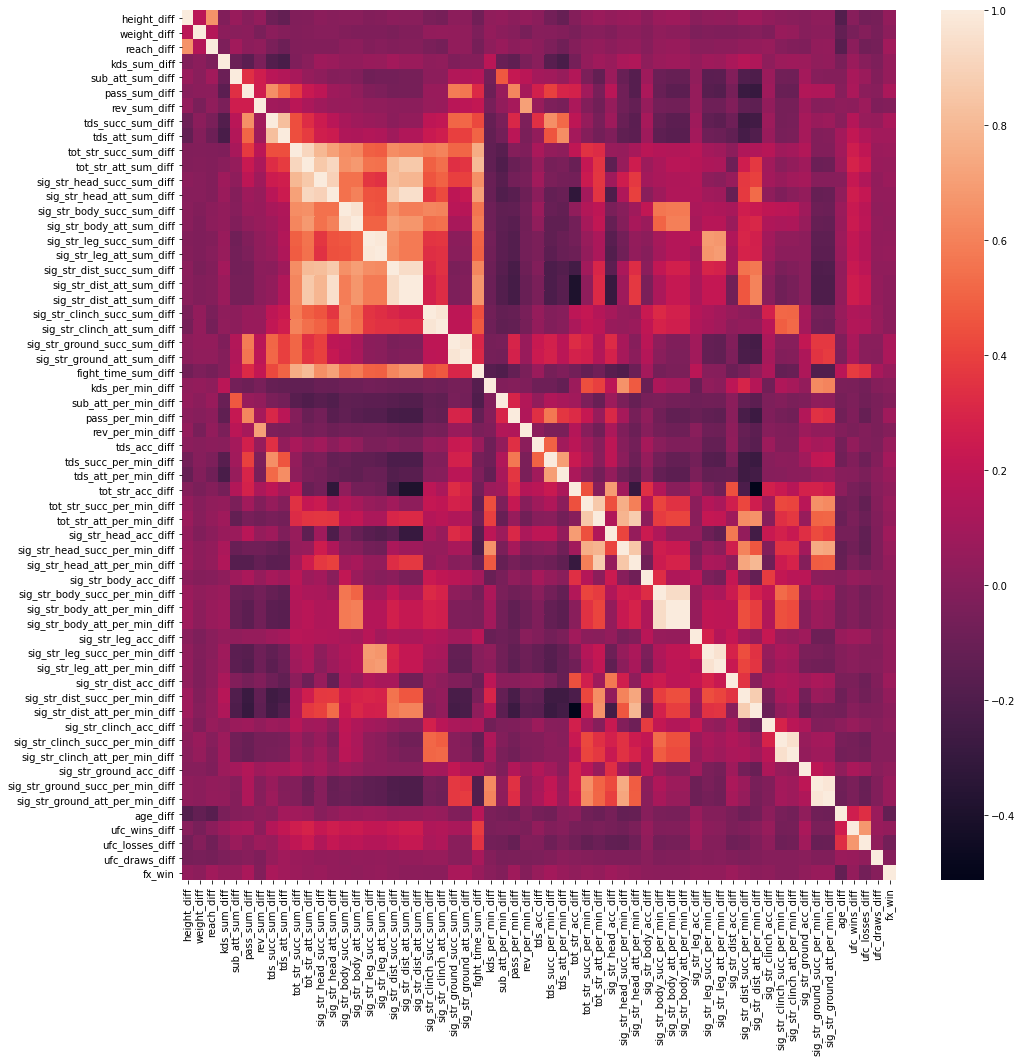

In [140]:
plt.figure(figsize=(16,16))
sns.heatmap(cor_mat, annot=False)
plt.show()

In [153]:
df_corr = pd.DataFrame(cor_mat['fx_win'].abs().sort_values(ascending=False))

In [155]:
df_corr.reset_index(inplace=True)

In [166]:
top_corr = df_corr[:20]['index']

In [164]:
top_corr

[0                               fx_win
 1          sig_str_ground_att_sum_diff
 2         sig_str_ground_succ_sum_diff
 3                             age_diff
 4                    tds_succ_sum_diff
 5                        pass_sum_diff
 6                tds_succ_per_min_diff
 7                     tds_att_sum_diff
 8                           reach_diff
 9                    pass_per_min_diff
 10               sig_str_head_acc_diff
 11               sig_str_dist_acc_diff
 12               tot_str_succ_sum_diff
 13                     ufc_losses_diff
 14          sig_str_head_succ_sum_diff
 15     sig_str_ground_att_per_min_diff
 16    sig_str_ground_succ_per_min_diff
 17                tds_att_per_min_diff
 18                 fight_time_sum_diff
 19                        tds_acc_diff
 Name: index, dtype: object]

In [169]:
df2[top_corr].to_csv('data_cleaned4.csv', index=False)